# Enhanced Student Dropout Prediction Model Comparison

This analysis compares 6 machine learning models optimized for **dropout recall** - 
the primary metric for identifying students at risk of withdrawal.

**Class Labels:**
- 0: Withdrawn (target class for early intervention)
- 1: Fail  
- 2: Pass

**Primary Evaluation Metrics (in order of importance):**
1. Dropout Recall (main optimization target)
2. Dropout Precision 
3. At-Risk Recall
4. Weighted Recall

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Set display options (following original notebook style)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Set style for better readability
plt.style.use('seaborn-v0_8')
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.titlesize': 20
})

In [2]:
# ================================================================
# 2: Define Model Paths and Load Metrics
# ================================================================

print("\n📂 LOADING MODEL METRICS AND RESULTS")
print("=" * 50)

# Define model information for all 6 models with academic-friendly colors
models_info = {
    'Random Forest': {
        'name': 'random_forest_optimized',
        'display_name': 'Random Forest',
        'color': '#2166ac',  # Academic blue
        'description': 'Ensemble of decision trees'
    },
    'Logistic Regression': {
        'name': 'multinomial_logistic_regression_optimized',
        'display_name': 'Logistic Regression',
        'color': '#b2182b',  # Deep red
        'description': 'Linear classification model'
    },
    'KNN': {
        'name': 'knn_optimized',
        'display_name': 'K-Nearest Neighbors',
        'color': '#35978f',  # Teal
        'description': 'Instance-based learning'
    },
    'LightGBM': {
        'name': 'lightgbm_optimized',
        'display_name': 'LightGBM',
        'color': '#756bb1',  # Muted purple
        'description': 'Gradient boosting framework'
    },
    'SVM': {
        'name': 'svm_optimized',
        'display_name': 'Support Vector Machine',
        'color': '#bf812d',  # Warm brown
        'description': 'Maximum margin classifier'
    },
    'Neural Networks': {
        'name': 'neural_network_optimized',
        'display_name': 'Neural Networks',
        'color': '#31a354',  # Forest green
        'description': 'Multi-layer perceptron'
    }
}

# Define base directories
base_dir = '../Data'
model_metrics_base = os.path.join(base_dir, 'model_metrics')
models_dir = os.path.join(model_metrics_base, 'models')
metrics_dir = os.path.join(model_metrics_base, 'metrics')
reports_dir = os.path.join(model_metrics_base, 'reports')

print(f"📁 Metrics directory: {metrics_dir}")

# Initialize storage dictionaries 
all_metrics = {}
all_confusion_matrices = {}
all_classification_reports = {}
all_coefficients = {}

# Load metrics for each model 
for model_key, model_info in models_info.items():
    model_name = model_info['name']
    
    try:
        # Load main metrics file
        metrics_path = os.path.join(metrics_dir, f"{model_name}_metrics.json")
        if not os.path.exists(metrics_path):
            # Try current directory if metrics subdirectory doesn't exist
            metrics_path = f"{model_name}_metrics.json"
        
        with open(metrics_path, 'r') as f:
            all_metrics[model_key] = json.load(f)
        
        # Load classification report
        report_path = os.path.join(reports_dir, f"{model_name}_classification_report.json")
        if not os.path.exists(report_path):
            # Try current directory if reports subdirectory doesn't exist
            report_path = f"{model_name}_classification_report.json"
        
        try:
            with open(report_path, 'r') as f:
                all_classification_reports[model_key] = json.load(f)
        except FileNotFoundError:
            print(f"⚠️ Classification report not found for {model_key}")
        
        # Load confusion matrix
        cm_path = os.path.join(metrics_dir, f"{model_name}_confusion_matrix.json")
        if not os.path.exists(cm_path):
            # Try current directory if metrics subdirectory doesn't exist
            cm_path = f"{model_name}_confusion_matrix.json"
        
        with open(cm_path, 'r') as f:
            cm_data = json.load(f)
            all_confusion_matrices[model_key] = pd.DataFrame(
                cm_data['confusion_matrix'],
                columns=cm_data.get('class_labels', [0, 1, 2]),
                index=cm_data.get('class_labels', [0, 1, 2])
            )
        
        # Load coefficients file (if available)
        coefficients_path = os.path.join(metrics_dir, f"{model_name}_coefficients.json")
        if not os.path.exists(coefficients_path):
            # Try current directory if metrics subdirectory doesn't exist
            coefficients_path = f"{model_name}_coefficients.json"
        
        try:
            with open(coefficients_path, 'r') as f:
                all_coefficients[model_key] = json.load(f)
        except FileNotFoundError:
            print(f"⚠️ Coefficients file not found for {model_key}")
        
        print(f"✅ Loaded {model_key}")
        
    except FileNotFoundError:
        print(f"❌ Files not found for {model_key}")
        continue

print(f"\n🎉 Loaded metrics for {len(all_metrics)} models!")

# Summary of loaded data
print(f"\n📊 LOADED DATA SUMMARY:")
print(f"   • Metrics files: {len(all_metrics)}")
print(f"   • Classification reports: {len(all_classification_reports)}")
print(f"   • Confusion matrices: {len(all_confusion_matrices)}")
print(f"   • Coefficients files: {len(all_coefficients)}")

if all_coefficients:
    print(f"\n🔍 Models with coefficient data:")
    for model_key in all_coefficients.keys():
        print(f"   • {model_key}")

# Class labels and names 
class_labels = {0: 'Withdrawn', 1: 'Fail', 2: 'Pass'}
#class_colors = ['#e74c3c', '#f39c12', '#27ae60']  # Red, Orange, Green
class_colors = ['#b2182b', '#969696', '#2166ac']  # Deep red, Medium gray, Academic blue



📂 LOADING MODEL METRICS AND RESULTS
📁 Metrics directory: ../Data\model_metrics\metrics
✅ Loaded Random Forest
✅ Loaded Logistic Regression
✅ Loaded KNN
✅ Loaded LightGBM
✅ Loaded SVM
✅ Loaded Neural Networks

🎉 Loaded metrics for 6 models!

📊 LOADED DATA SUMMARY:
   • Metrics files: 6
   • Classification reports: 6
   • Confusion matrices: 6
   • Coefficients files: 6

🔍 Models with coefficient data:
   • Random Forest
   • Logistic Regression
   • KNN
   • LightGBM
   • SVM
   • Neural Networks



📊 CREATING DATA STRATIFICATION ANALYSIS


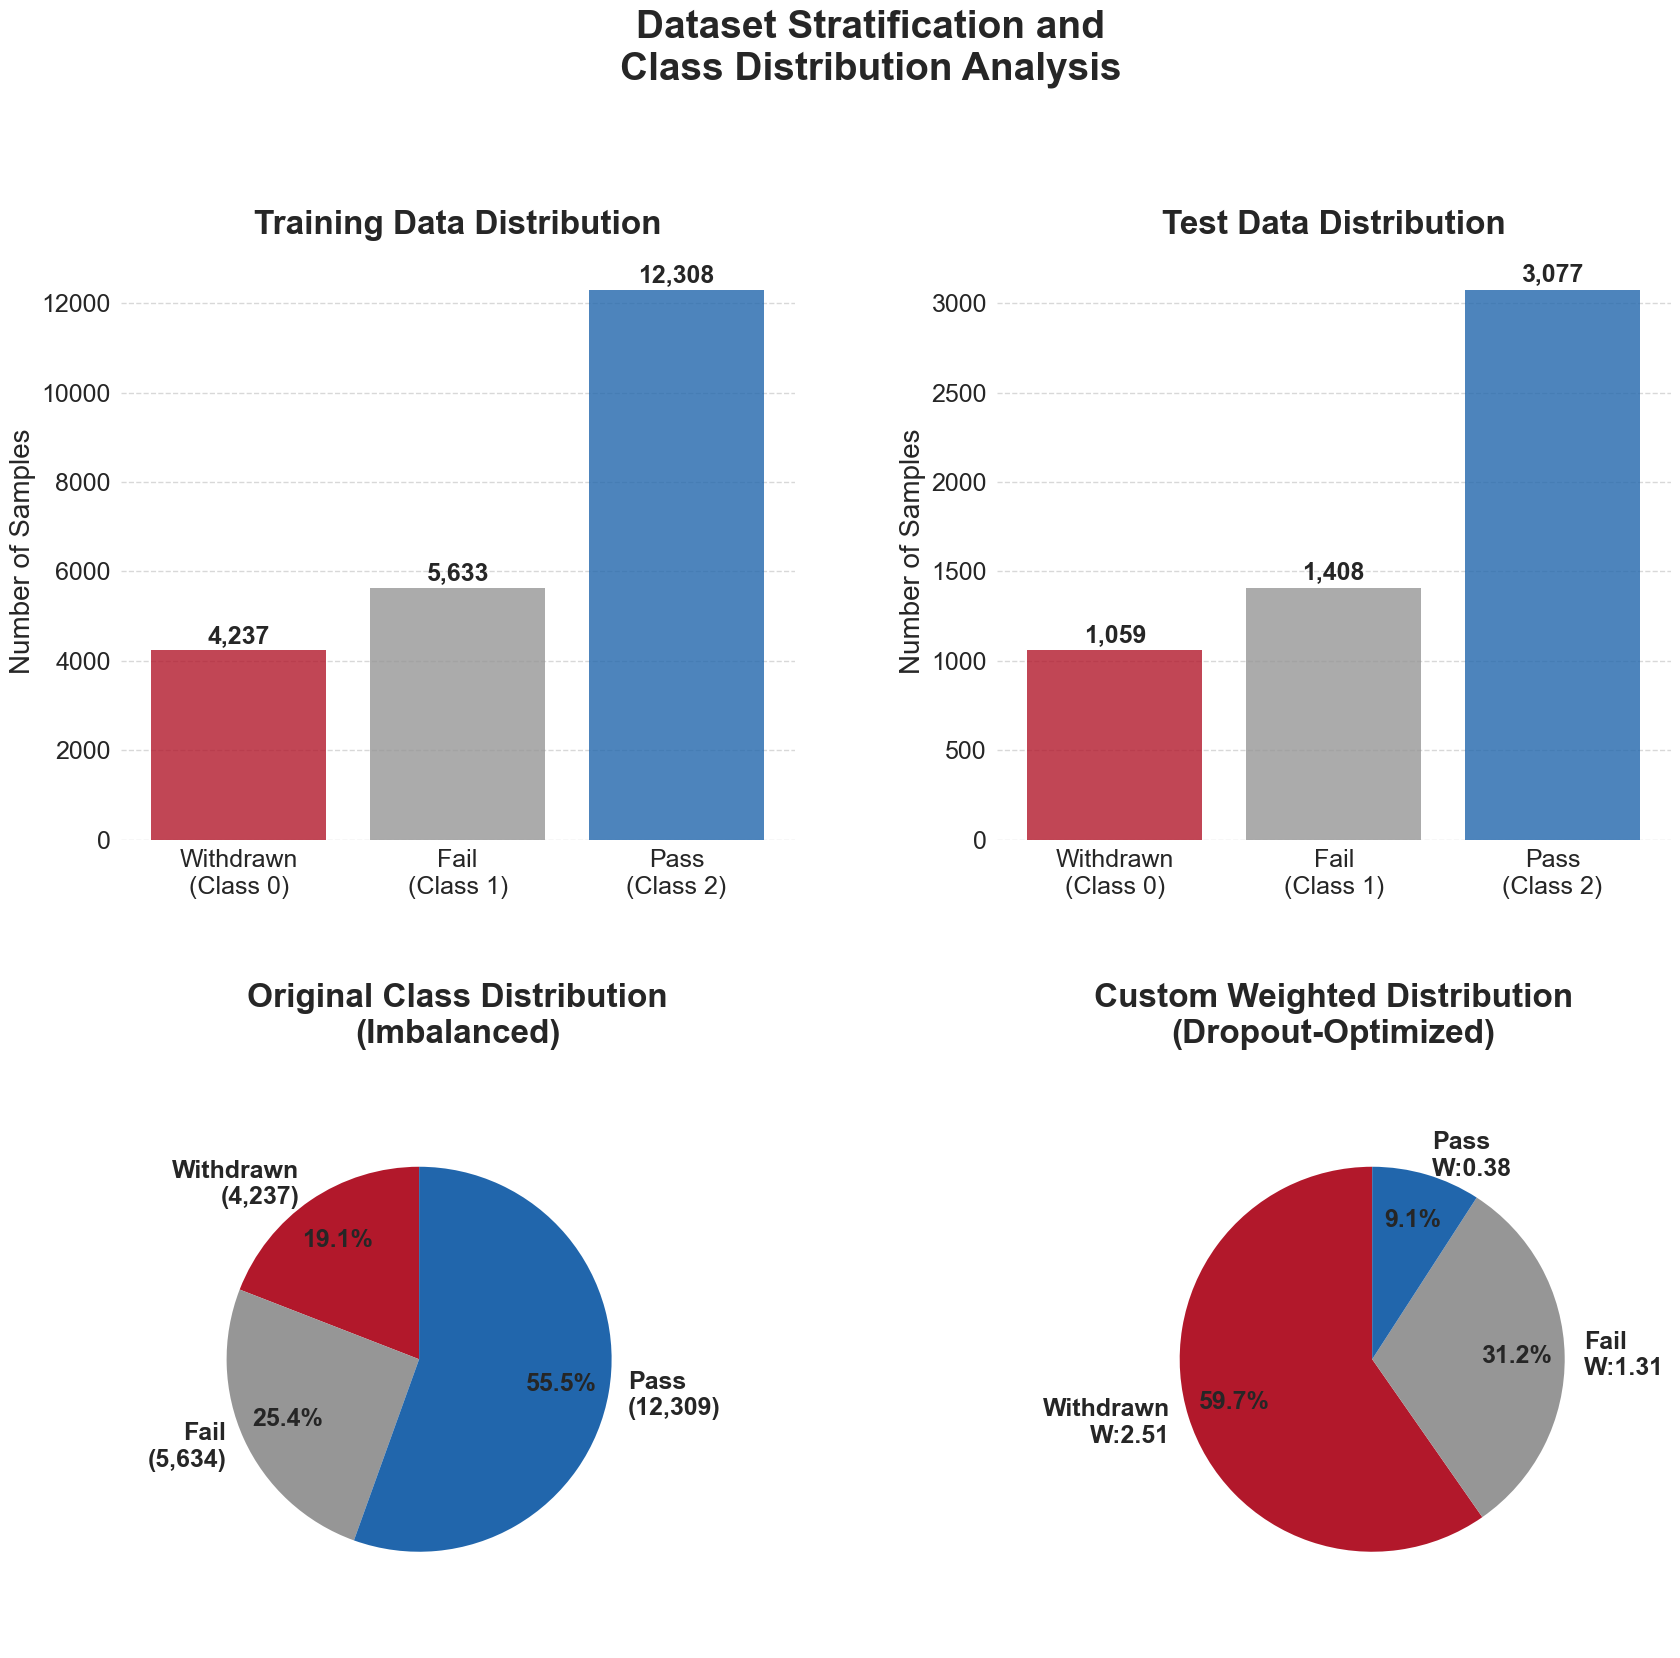

In [3]:
# ================================================================
# 3. Data Stratification and Class Distribution Analysis
# ================================================================

print("\n📊 CREATING DATA STRATIFICATION ANALYSIS")
print("=" * 50)

# Extract dataset info from the first available model
if all_metrics:
    sample_model = list(all_metrics.keys())[0]
    dataset_info = all_metrics[sample_model]['dataset_info']
    
    # Prepare data for stratification plot
    train_samples = dataset_info['training_samples']
    test_samples = dataset_info['test_samples']
    class_dist = dataset_info['class_distribution']
    
    # Calculate class distributions for train/test (assuming same proportions)
    total_samples = train_samples + test_samples
    class_percentages = {int(k): v / sum(class_dist.values()) for k, v in class_dist.items()}
    
    train_dist = {k: int(train_samples * pct) for k, pct in class_percentages.items()}
    test_dist = {k: int(test_samples * pct) for k, pct in class_percentages.items()}
    
    # Create stratification plot with adjusted spacing
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 18), 
                                                  gridspec_kw={'hspace': 0.4})  # Added vertical space between rows
    # Set white background for the entire figure
    fig.patch.set_facecolor('white')
    fig.suptitle('Dataset Stratification and\nClass Distribution Analysis', 
                 fontsize=28, fontweight='bold', y=1.02)  # Increased main title
    
    # Training data distribution
    train_labels = [f'{class_labels[k]}\n(Class {k})' for k in sorted(train_dist.keys())]
    train_values = [train_dist[k] for k in sorted(train_dist.keys())]
    # Set white background
    ax1.set_facecolor('white')
    # Remove background color and add only y-grid
    ax1.grid(axis='y', alpha=0.3, color='gray', linestyle='--')
    bars1 = ax1.bar(train_labels, train_values, color=class_colors, alpha=0.8)
    ax1.set_title('Training Data Distribution', fontsize=24, fontweight='bold', pad=20)
    ax1.set_ylabel('Number of Samples', fontsize=20)
    ax1.tick_params(axis='both', which='major', labelsize=18)
    
    # Add value labels on bars
    for bar, value in zip(bars1, train_values):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 50,
                 f'{value:,}', ha='center', va='bottom', fontsize=18, fontweight='bold')  # Increased bar values
    
    # Test data distribution
    test_labels = [f'{class_labels[k]}\n(Class {k})' for k in sorted(test_dist.keys())]
    test_values = [test_dist[k] for k in sorted(test_dist.keys())]
    # Set white background
    ax2.set_facecolor('white')
    # Remove background color and add only y-grid
    ax2.grid(axis='y', alpha=0.3, color='gray', linestyle='--')
    bars2 = ax2.bar(test_labels, test_values, color=class_colors, alpha=0.8)
    ax2.set_title('Test Data Distribution', fontsize=24, fontweight='bold', pad=20)
    ax2.set_ylabel('Number of Samples', fontsize=20)
    ax2.tick_params(axis='both', which='major', labelsize=18)
    
    # Add value labels on bars
    for bar, value in zip(bars2, test_values):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 20,
                 f'{value:,}', ha='center', va='bottom', fontsize=18, fontweight='bold')
    
    # Original class imbalance pie chart
    original_sizes = [class_dist[str(k)] for k in sorted([int(x) for x in class_dist.keys()])]
    # Adjust label format to be more compact
    original_labels = [f'{class_labels[k]}\n({class_dist[str(k)]:,})' for k in sorted([int(x) for x in class_dist.keys()])]
    
    # Add more spacing between pie chart elements and adjust label positions
    wedges1, texts1, autotexts1 = ax3.pie(original_sizes, 
                                         labels=original_labels, 
                                         colors=class_colors,
                                         autopct='%1.1f%%', 
                                         startangle=90, 
                                         labeldistance=1.1,  # Adjusted label distance
                                         pctdistance=0.75,   # Move percentages inward
                                         textprops={'fontsize': 18, 'fontweight': 'bold'})
    ax3.set_title('Original Class Distribution\n(Imbalanced)', 
                  fontsize=24, fontweight='bold', pad=20)
    
    # Adjust autopct text properties
    plt.setp(autotexts1, size=18, weight="bold")
    
    # Create more space for the text by expanding the axis
    ax3.set_xlim(-1.3, 1.7)  # Asymmetric limits to give more space on the right
    ax3.set_ylim(-1.5, 1.5)
    
    # Custom weighted distribution
    # Extract balanced weights from logistic regression model
    lr_model = all_metrics.get('Logistic Regression', {})
    if lr_model and 'hyperparameters' in lr_model:
        best_params = lr_model['hyperparameters']['best_params']
        if 'class_weight' in best_params:
            balanced_weights = {int(k): v for k, v in best_params['class_weight'].items()}
        else:
            balanced_weights = {0: 2.09, 1: 1.31, 2: 0.48}  # Default from provided data
    else:
        balanced_weights = {0: 2.09, 1: 1.31, 2: 0.48}  # Default from provided data
    
    custom_weights = {
        0: balanced_weights[0] * 1.2,  # Increased focus on Withdrawn
        1: balanced_weights[1] * 1.0,  # Standard for Fail
        2: balanced_weights[2] * 0.8   # Reduced for Pass
    }
    
    # Normalize custom weights for pie chart
    total_weight = sum(custom_weights.values())
    custom_percentages = [custom_weights[k]/total_weight * 100 for k in sorted(custom_weights.keys())]
    # Adjust label format to prevent overlap
    custom_labels = [f'{class_labels[k]}\nW:{custom_weights[k]:.2f}' for k in sorted(custom_weights.keys())]
    
    wedges2, texts2, autotexts2 = ax4.pie(custom_percentages, 
                                          labels=custom_labels, 
                                          colors=class_colors,
                                          autopct='%1.1f%%', 
                                          startangle=90, 
                                          labeldistance=1.1,  # Adjusted label distance
                                          pctdistance=0.75,   # Move percentages inward
                                          textprops={'fontsize': 18, 'fontweight': 'bold'})
    ax4.set_title('Custom Weighted Distribution\n(Dropout-Optimized)', 
                  fontsize=24, fontweight='bold', pad=20)
    
    # Adjust autopct text properties
    plt.setp(autotexts2, size=18, weight="bold")
    
    # Create more space for the text by expanding the axis
    ax4.set_xlim(-1.7, 1.3)  # Asymmetric limits to give more space on the left
    ax4.set_ylim(-1.5, 1.5)
    
    # Add more horizontal space between subplots
    plt.subplots_adjust(wspace=0.3)
    
    # Adjust layout with more space at the top and between rows
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.subplots_adjust(hspace=0.4)  # Ensure vertical spacing is maintained
    plt.show()

In [4]:
# ================================================================
# 4. Model Performance Comparison
# ================================================================

print("\n📊 EXTRACTING PERFORMANCE METRICS")
print("=" * 40)

# Extract performance metrics for all models 
models_performance = {}
for model_key, metrics_data in all_metrics.items():
    cv_results = metrics_data['cross_validation_results']['cv_scores_by_metric']
    runtime = metrics_data['model_info']['total_runtime_minutes']
    search_combinations = metrics_data['hyperparameters'].get('total_combinations_tested', 0)
    
    models_performance[model_key] = {
        'dropout_recall': cv_results['dropout_recall']['mean'],
        'dropout_precision': cv_results['dropout_precision']['mean'],
        'at_risk_recall': cv_results['at_risk_recall']['mean'],
        'weighted_recall': cv_results['recall_weighted']['mean'],
        'weighted_f1': cv_results['f1_weighted']['mean'],  # Adding weighted F1 score
        'runtime_hours': runtime / 60,
        'search_intensity': search_combinations,
        'color': models_info[model_key]['color'] 
    }

# Convert to DataFrame for easier plotting
df_performance = pd.DataFrame(models_performance).T

# Sort by dropout_recall (primary metric)
df_performance_sorted = df_performance.sort_values('dropout_recall', ascending=False)

print("Model Rankings (by Dropout Recall):")
for i, (model, row) in enumerate(df_performance_sorted.iterrows(), 1):
    print(f"{i}. {model}: {row['dropout_recall']:.4f}")



📊 EXTRACTING PERFORMANCE METRICS
Model Rankings (by Dropout Recall):
1. Logistic Regression: 0.6684
2. SVM: 0.6309
3. Random Forest: 0.5896
4. LightGBM: 0.5601
5. KNN: 0.3127
6. Neural Networks: 0.1867



📊 CREATING PERFORMANCE BAR CHARTS


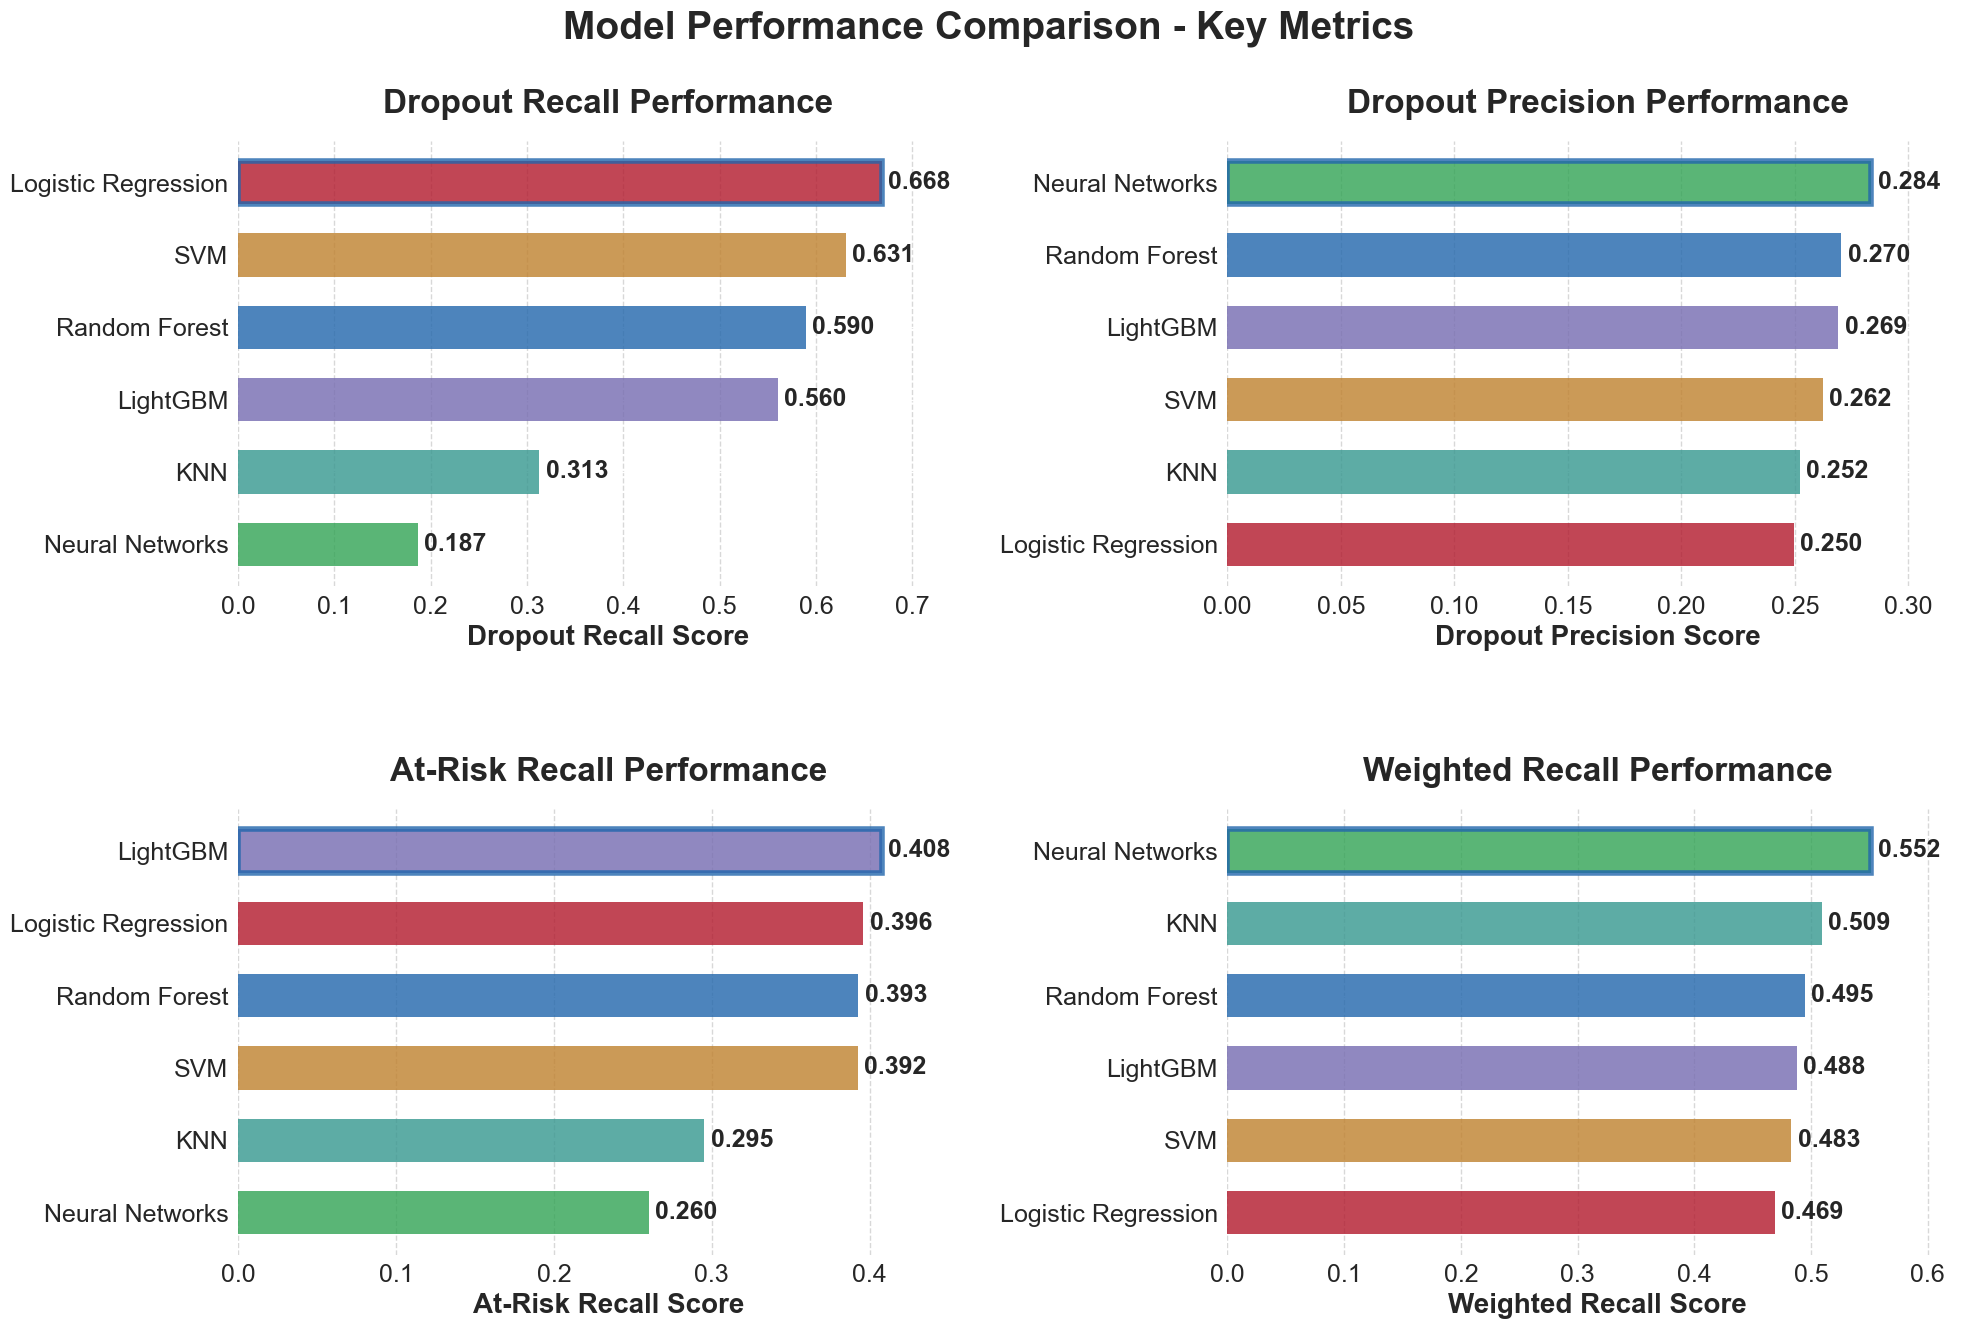

In [5]:
# ================================================================
# 5. Horizontal Bar Charts for Key Metrics
# ================================================================

print("\n📊 CREATING PERFORMANCE BAR CHARTS")
print("=" * 40)

metrics_to_plot = ['dropout_recall', 'dropout_precision', 'at_risk_recall', 'weighted_recall']
metric_labels = ['Dropout Recall', 'Dropout Precision', 'At-Risk Recall', 'Weighted Recall']

fig, axes = plt.subplots(2, 2, figsize=(20, 14))

# Set white background for the entire figure
fig.patch.set_facecolor('white')
fig.suptitle('Model Performance Comparison - Key Metrics', 
             fontsize=28, fontweight='bold', y=0.95)

for idx, (metric, label) in enumerate(zip(metrics_to_plot, metric_labels)):
    ax = axes[idx // 2, idx % 2]
    
    # Set white background for each subplot
    ax.set_facecolor('white')
    
    # Sort by current metric for this plot
    metric_data = df_performance.sort_values(metric, ascending=True)
    
    # Use original model colors
    colors = [metric_data.loc[model, 'color'] for model in metric_data.index]
    
    # Add subtle grid lines
    ax.grid(axis='x', alpha=0.3, color='gray', linestyle='--')
    
    bars = ax.barh(range(len(metric_data)), metric_data[metric], 
                   color=colors, alpha=0.8, height=0.6)
    
    # Add value labels with larger font
    for i, (bar, value) in enumerate(zip(bars, metric_data[metric])):
        ax.text(value + max(metric_data[metric])*0.01, bar.get_y() + bar.get_height()/2, 
               f'{value:.3f}', va='center', ha='left', fontsize=18, fontweight='bold')
    
    ax.set_yticks(range(len(metric_data)))
    ax.set_yticklabels(metric_data.index, fontsize=18)
    ax.set_xlabel(f'{label} Score', fontsize=20, fontweight='bold')
    ax.set_title(f'{label} Performance', fontsize=24, fontweight='bold', pad=20)
    ax.set_xlim(0, max(metric_data[metric]) * 1.15)
    
    # Highlight best performer with a professional dark blue border
    best_idx = metric_data[metric].idxmax()
    best_pos = list(metric_data.index).index(best_idx)
    bars[best_pos].set_edgecolor('#2166ac')  # Academic blue for the border
    bars[best_pos].set_linewidth(4)  # Slightly thicker border
    
    # Increase tick label size
    ax.tick_params(axis='both', which='major', labelsize=18)

# Adjust layout with proper spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to prevent title overlap
plt.subplots_adjust(hspace=0.5)  # Ensure spacing is maintained
plt.show()


⏱️ CREATING RUNTIME ANALYSIS


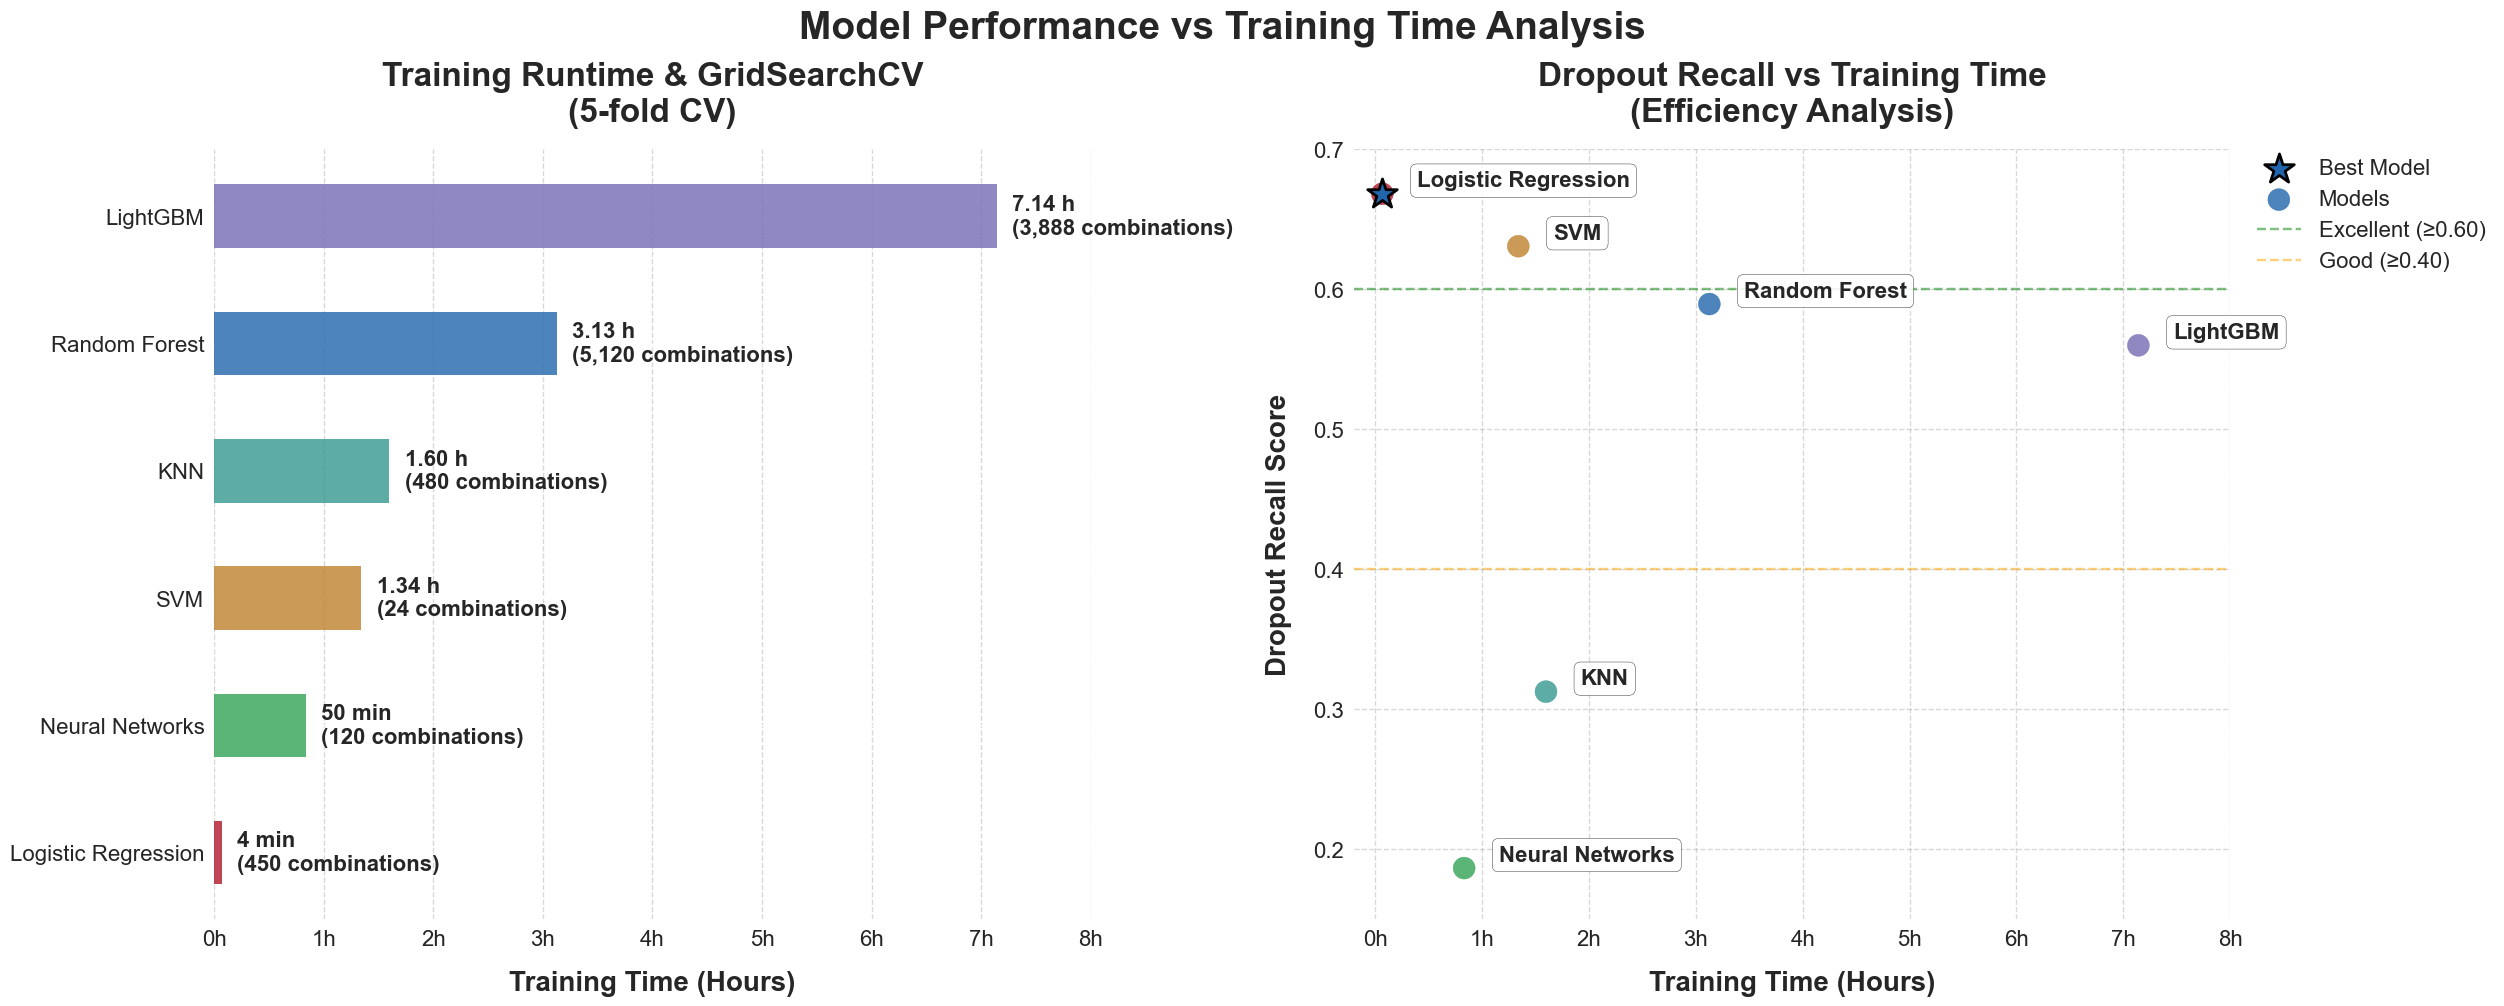

In [6]:
# ================================================================
# 6. Training Runtime Analysis with Hyperparameter Search Intensity
# ================================================================

print("\n⏱️ CREATING RUNTIME ANALYSIS")
print("=" * 30)

# Create figure with more height for better spacing
fig = plt.figure(figsize=(24, 10))  # Increased width for padding
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1], wspace=0.3)
gs.update(left=0.08, right=0.92)  # Add padding on both sides

# Create subplots with the new gridspec
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Set white background
fig.patch.set_facecolor('white')
ax1.set_facecolor('white')
ax2.set_facecolor('white')

# Main title with adjusted position
fig.suptitle('Model Performance vs Training Time Analysis', 
             fontsize=28, fontweight='bold', y=1.02)

# Runtime bar chart
runtime_data = df_performance.sort_values('runtime_hours', ascending=True)
colors = [runtime_data.loc[model, 'color'] for model in runtime_data.index]

# Add subtle grid lines
ax1.grid(axis='x', alpha=0.3, color='gray', linestyle='--')
ax2.grid(True, alpha=0.3, color='gray', linestyle='--')

# Create horizontal bars
bars = ax1.barh(range(len(runtime_data)), runtime_data['runtime_hours'], 
                color=colors, alpha=0.8, height=0.5)

# Add value labels with appropriate units and search intensity
for i, (bar, value) in enumerate(zip(bars, runtime_data['runtime_hours'])):
    model_name = runtime_data.index[i]
    search_intensity = runtime_data.loc[model_name, 'search_intensity']
    
    if value < 1:
        time_label = f'{value*60:.0f} min'
    else:
        time_label = f'{value:.2f} h'
    
    # Add search intensity info with better spacing
    label = f'{time_label}\n({search_intensity:,} combinations)'
    ax1.text(value + max(runtime_data['runtime_hours'])*0.02, bar.get_y() + bar.get_height()/2, 
             label, va='center', ha='left', fontsize=16, fontweight='bold')

# Configure first plot
ax1.set_yticks(range(len(runtime_data)))
ax1.set_yticklabels(runtime_data.index, fontsize=16)
ax1.set_xlabel('Training Time (Hours)', fontsize=20, fontweight='bold', labelpad=15)
ax1.set_title('Training Runtime & GridSearchCV\n(5-fold CV)', 
              fontsize=24, fontweight='bold', pad=20)

# Set x-axis ticks with consistent scale
major_ticks = np.arange(0, 9, 1)  # 0 to 8 hours
ax1.set_xticks(major_ticks)
ax1.set_xticklabels([f'{t:.0f}h' for t in major_ticks], fontsize=16)
ax1.set_xlim(0, 8)  # Fixed scale for both plots

# Highlight best model first (Logistic Regression) - this will appear first in legend
best_model = df_performance['dropout_recall'].idxmax()
best_row = df_performance.loc[best_model]
best_point = ax2.scatter(best_row['runtime_hours'], best_row['dropout_recall'], 
                        s=500, color='#2166ac', marker='*', 
                        edgecolor='black', linewidth=2, zorder=5,
                        label='Best Model')  # Add label for legend

# Create scatter plot with original colors and labels
colors_scatter = [df_performance.loc[model, 'color'] for model in df_performance.index]
scatter = ax2.scatter(df_performance['runtime_hours'], df_performance['dropout_recall'], 
                     s=250, alpha=0.8, c=colors_scatter, label='Models')

# Add model labels with better positioning
for model, row in df_performance.iterrows():
    # Adjust text position based on point location
    xytext = (25, 5)
    ax2.annotate(model, 
                (row['runtime_hours'], row['dropout_recall']),
                xytext=xytext, textcoords='offset points',
                fontsize=16, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9))

# Configure plot
ax2.set_xlabel('Training Time (Hours)', fontsize=20, fontweight='bold', labelpad=15)
ax2.set_ylabel('Dropout Recall Score', fontsize=20, fontweight='bold', labelpad=15)
ax2.set_title('Dropout Recall vs Training Time\n(Efficiency Analysis)', 
              fontsize=24, fontweight='bold', pad=20)

# Set axis formatting
ax2.tick_params(axis='both', which='major', labelsize=16)
major_ticks = np.arange(0, 9, 1)  # 0 to 8 hours
ax2.set_xticks(major_ticks)
ax2.set_xticklabels([f'{t:.0f}h' for t in major_ticks], fontsize=16)
ax2.set_xlim(-0.2, 8)  # Start from -0.2 to show Logistic Regression
ax2.set_ylim(0.15, 0.7)

# Add performance zone boundaries
ax2.axhline(y=0.6, color='green', linestyle='--', alpha=0.5, label='Excellent (≥0.60)')
ax2.axhline(y=0.4, color='orange', linestyle='--', alpha=0.5, label='Good (≥0.40)')

# Add legend with both markers and performance zones
ax2.legend(fontsize=16, bbox_to_anchor=(1.02, 1), 
          loc='upper left', borderaxespad=0)

# Final layout adjustments with preserved padding
plt.tight_layout(rect=[0.08, 0, 0.92, 0.95])
plt.show()



🎯 CREATING RADAR PLOT COMPARISON


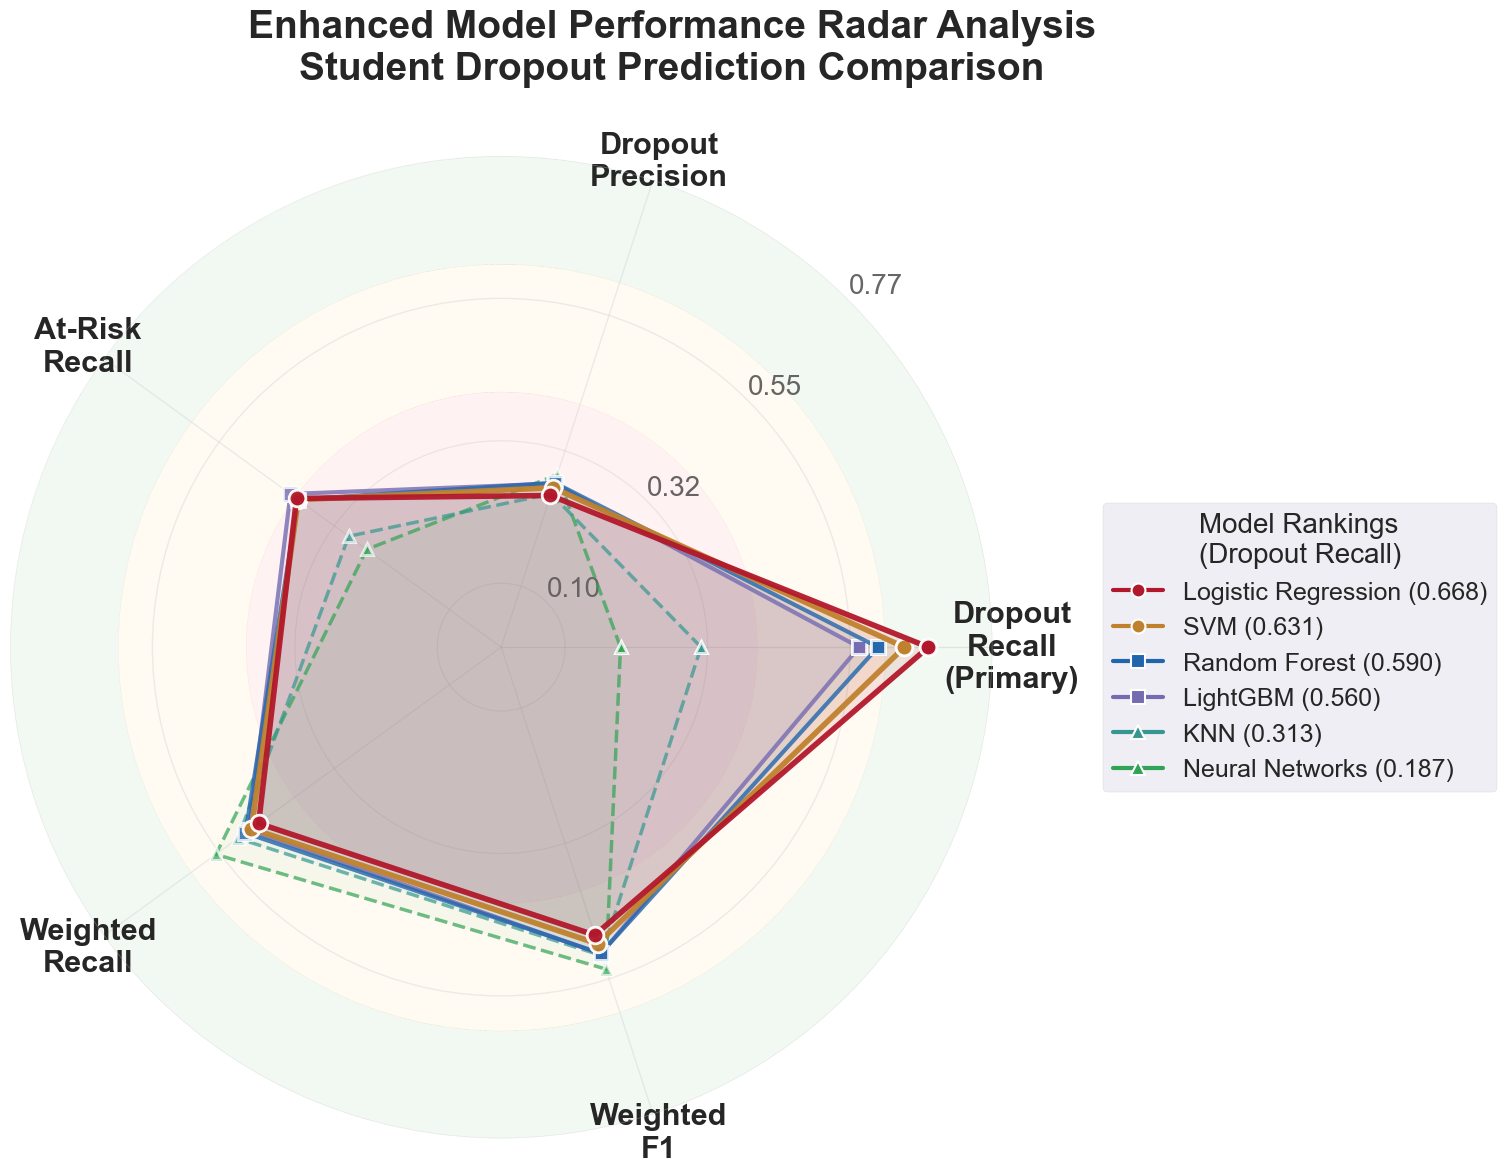

In [7]:
# ================================================================
# 7. Radar Plot Comparison 
# ================================================================

print("\n🎯 CREATING RADAR PLOT COMPARISON")
print("=" * 35)

from math import pi

# Prepare data for radar plot with comprehensive metrics
metrics_radar = ['dropout_recall', 'dropout_precision', 'at_risk_recall', 'weighted_recall', 'weighted_f1']
metric_labels_radar = [
    'Dropout\nRecall\n(Primary)', 
    'Dropout\nPrecision', 
    'At-Risk\nRecall', 
    'Weighted\nRecall', 
    'Weighted\nF1'
]

# Create enhanced radar plot focused on visualization
fig = plt.figure(figsize=(16, 12))

# Set white background
fig.patch.set_facecolor('white')

# Main title with proper spacing
fig.suptitle('Enhanced Model Performance Radar Analysis\nStudent Dropout Prediction Comparison', 
             fontsize=28, fontweight='bold', y=0.98)

# ============ Enhanced Radar Plot ============
ax1 = fig.add_subplot(111, projection='polar')
ax1.set_facecolor('white')

# Number of metrics and angles
num_metrics = len(metrics_radar)
angles = [n / float(num_metrics) * 2 * pi for n in range(num_metrics)]
angles += angles[:1]  # Complete the circle

# Enhanced color scheme with performance-based styling
model_names = list(df_performance_sorted.index)  # Sorted by dropout recall
performance_tiers = {
    'top': model_names[:2],      # Top 2 performers
    'middle': model_names[2:4],  # Middle performers
    'low': model_names[4:]       # Lower performers
}

# Enhanced styling for different performance tiers
for i, model in enumerate(model_names):
    values = [df_performance.loc[model, metric] for metric in metrics_radar]
    values += values[:1]  # Complete the circle
    
    model_color = df_performance.loc[model, 'color']
    
    # Determine styling based on performance tier
    if model in performance_tiers['top']:
        linewidth = 4.0
        markersize = 12
        alpha_line = 0.95
        alpha_fill = 0.2
        linestyle = '-'
        marker = 'o'
    elif model in performance_tiers['middle']:
        linewidth = 3.0
        markersize = 10
        alpha_line = 0.8
        alpha_fill = 0.15
        linestyle = '-'
        marker = 's'
    else:
        linewidth = 2.5
        markersize = 8
        alpha_line = 0.7
        alpha_fill = 0.08
        linestyle = '--'
        marker = '^'
    
    # Plot with enhanced styling
    line = ax1.plot(angles, values, marker=marker, linewidth=linewidth, 
                   label=f'{model} ({values[0]:.3f})', color=model_color, 
                   alpha=alpha_line, markersize=markersize,
                   markeredgewidth=2, markeredgecolor='white',
                   linestyle=linestyle, zorder=10-i)
    
    # Enhanced gradient fill effect with fainter zones
    ax1.fill(angles, values, color=model_color, alpha=alpha_fill * 0.5)  # Make zones fainter

# Enhanced customization
ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(metric_labels_radar, fontsize=22, fontweight='bold', 
                   rotation=0, ha='center')  # Increased metric labels size

# Improved y-axis with better scaling
max_value = df_performance[metrics_radar].max().max()
y_max = min(0.8, max_value * 1.15)  # Dynamic scaling with reasonable cap
yticks = np.linspace(0.1, y_max, 4)  # 4 evenly spaced ticks
ax1.set_ylim(0, y_max)
ax1.set_yticks(yticks)
ax1.set_yticklabels([f'{t:.2f}' for t in yticks], fontsize=24, alpha=0.8)  # Further increased boundary numbers size

# Enhanced grid with concentric circles
ax1.grid(True, color='lightgray', alpha=0.4, linestyle='-', linewidth=1)
ax1.set_rgrids(yticks, labels=[f'{t:.2f}' for t in yticks], 
               angle=45, fontsize=20, alpha=0.7)  # Further increased radial grid labels size

# Add performance zones with subtle background coloring
theta = np.linspace(0, 2*np.pi, 100)
excellent_zone = ax1.fill_between(theta, 0.6, y_max, alpha=0.05, color='green', zorder=0)
good_zone = ax1.fill_between(theta, 0.4, 0.6, alpha=0.05, color='orange', zorder=0)
needs_improvement = ax1.fill_between(theta, 0, 0.4, alpha=0.05, color='red', zorder=0)

# Enhanced legend for radar plot with performance indicators
legend_elements = []
for model in model_names:
    model_color = df_performance.loc[model, 'color']
    dropout_score = df_performance.loc[model, 'dropout_recall']
    marker = 'o' if model in performance_tiers['top'] else 's' if model in performance_tiers['middle'] else '^'
    
    legend_elements.append(
        plt.Line2D([0], [0], marker=marker, color=model_color, 
                  label=f'{model} ({dropout_score:.3f})',
                  markersize=10, linewidth=3, markeredgecolor='white',
                  markeredgewidth=1.5)
    )

ax1.legend(handles=legend_elements, loc='center left', 
          bbox_to_anchor=(1.1, 0.5), fontsize=18, frameon=True,
          title='Model Rankings\n(Dropout Recall)', title_fontsize=20)  # Increased legend size

# Final layout adjustment with proper spacing
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Leave space at top for title
plt.show()


📋 CREATING COMPREHENSIVE PERFORMANCE TABLE

COMPREHENSIVE MODEL PERFORMANCE SUMMARY TABLE
Rank   Model                D.Recall   D.Precision  At-Risk    W.Recall   W.F1     Runtime    Tier  
------------------------------------------------------------------------------------------------------------------------
#1     Logistic Regression  0.668      0.250        0.396      0.469      0.474    4m         Top   
#2     SVM                  0.631      0.262        0.392      0.483      0.488    1.3h       Top   
#3     Random Forest        0.590      0.270        0.393      0.495      0.504    3.1h       Mid   
#4     LightGBM             0.560      0.269        0.408      0.488      0.505    7.1h       Mid   
#5     KNN                  0.313      0.252        0.295      0.509      0.507    1.6h       Low   
#6     Neural Networks      0.187      0.284        0.260      0.552      0.530    50m        Low   
Legend: D.Recall=Dropout Recall, D.Precision=Dropout Precision, At-Risk=At-Risk R

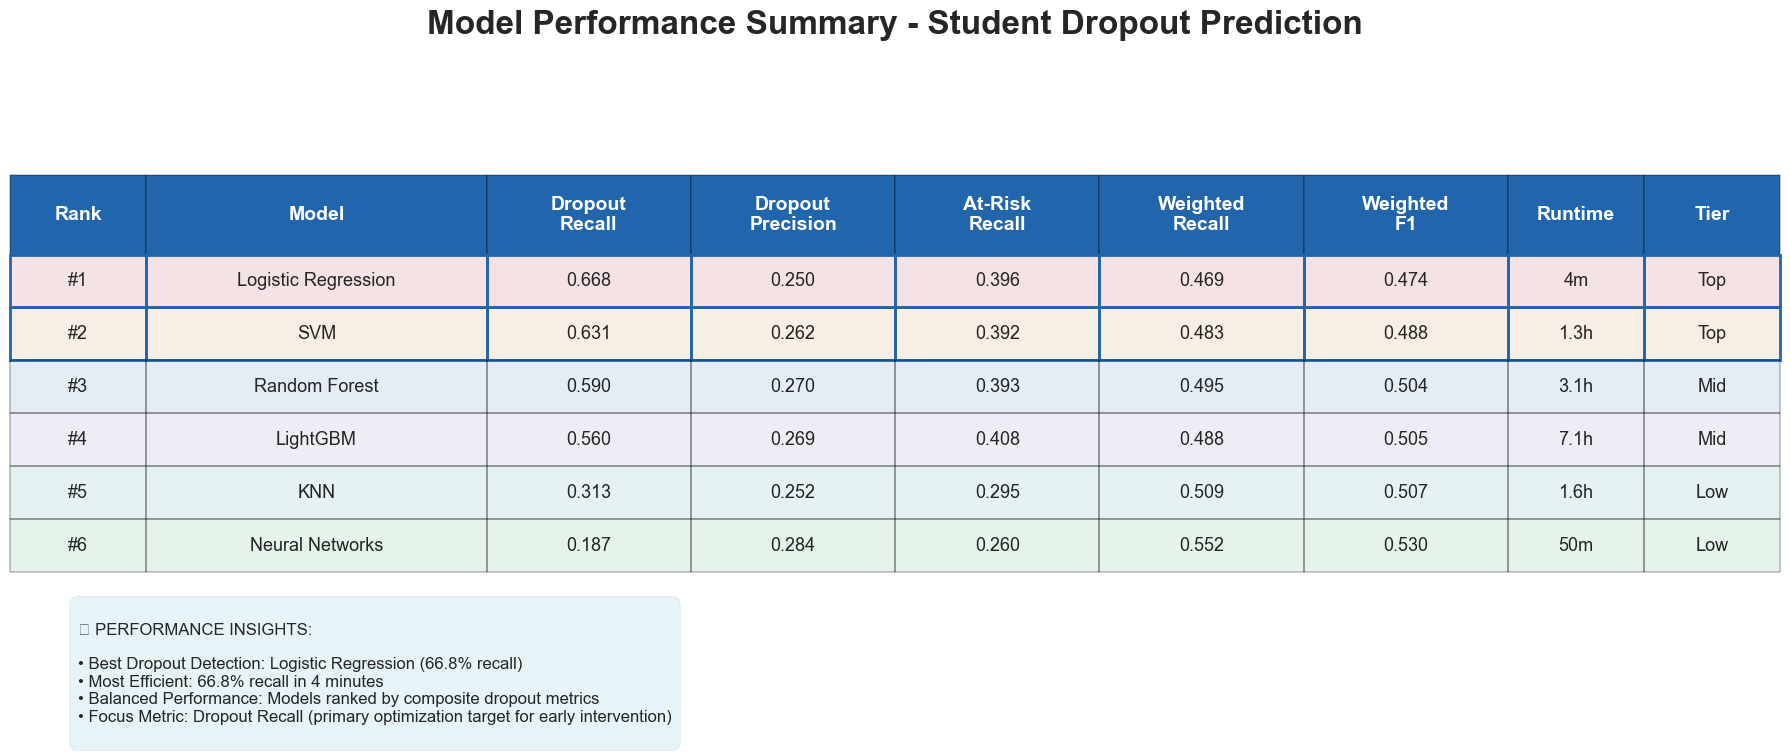

In [8]:
# ================================================================
# 8. Comprehensive Performance Summary Table
# ================================================================

print("\n📋 CREATING COMPREHENSIVE PERFORMANCE TABLE")
print("=" * 45)

# First, display a plain text table for easy reading
print("\n" + "="*120)
print("COMPREHENSIVE MODEL PERFORMANCE SUMMARY TABLE")
print("="*120)

# Create plain table headers
headers = ["Rank", "Model", "D.Recall", "D.Precision", "At-Risk", "W.Recall", "W.F1", "Runtime", "Tier"]
header_line = f"{'Rank':<6} {'Model':<20} {'D.Recall':<10} {'D.Precision':<12} {'At-Risk':<10} {'W.Recall':<10} {'W.F1':<8} {'Runtime':<10} {'Tier':<6}"
print(header_line)
print("-" * 120)

# Display data for each model
model_names = list(df_performance_sorted.index)  # Sorted by dropout recall
for i, model in enumerate(model_names):
    model_data = df_performance.loc[model]
    
    # Determine performance tier
    if model in model_names[:2]:
        tier = 'Top'
    elif model in model_names[2:4]:
        tier = 'Mid'
    else:
        tier = 'Low'
    
    # Format runtime appropriately
    runtime_minutes = model_data['runtime_hours'] * 60
    if runtime_minutes < 60:
        runtime_str = f"{runtime_minutes:.0f}m"
    else:
        runtime_str = f"{model_data['runtime_hours']:.1f}h"
    
    # Create formatted row
    row = f"#{i+1:<5} {model:<20} {model_data['dropout_recall']:<10.3f} {model_data['dropout_precision']:<12.3f} {model_data['at_risk_recall']:<10.3f} {model_data['weighted_recall']:<10.3f} {model_data['weighted_f1']:<8.3f} {runtime_str:<10} {tier:<6}"
    print(row)

print("=" * 120)
print("Legend: D.Recall=Dropout Recall, D.Precision=Dropout Precision, At-Risk=At-Risk Recall")
print("        W.Recall=Weighted Recall, W.F1=Weighted F1, Runtime=Training Time")
print("=" * 120)

# Create comprehensive performance summary with proper formatting
fig, ax = plt.subplots(figsize=(18, 8))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
ax.axis('off')

# Main title
fig.suptitle('Model Performance Summary - Student Dropout Prediction', 
             fontsize=24, fontweight='bold', y=0.95)

# Prepare comprehensive data
model_names = list(df_performance_sorted.index)  # Sorted by dropout recall
summary_data = []

for i, model in enumerate(model_names):
    model_data = df_performance.loc[model]
    
    # Determine performance tier
    if model in model_names[:2]:
        tier = 'Top'
    elif model in model_names[2:4]:
        tier = 'Mid'
    else:
        tier = 'Low'
    
    # Format runtime appropriately
    runtime_minutes = model_data['runtime_hours'] * 60
    if runtime_minutes < 60:
        runtime_str = f"{runtime_minutes:.0f}m"
    else:
        runtime_str = f"{model_data['runtime_hours']:.1f}h"
    
    summary_data.append([
        f"#{i+1}",
        model,
        f"{model_data['dropout_recall']:.3f}",
        f"{model_data['dropout_precision']:.3f}",
        f"{model_data['at_risk_recall']:.3f}",
        f"{model_data['weighted_recall']:.3f}",
        f"{model_data['weighted_f1']:.3f}",
        runtime_str,
        tier
    ])

# Create table with proper column headers
table_headers = [
    'Rank', 
    'Model', 
    'Dropout\nRecall', 
    'Dropout\nPrecision', 
    'At-Risk\nRecall',
    'Weighted\nRecall',
    'Weighted\nF1',
    'Runtime',
    'Tier'
]

# Create color scheme for rows based on model colors
import matplotlib.colors as mcolors
cell_colors = []
for i, model in enumerate(model_names):
    model_color = df_performance.loc[model, 'color']
    rgba = mcolors.to_rgba(model_color, alpha=0.12)
    cell_colors.append([rgba] * len(table_headers))

# Create the table with proper sizing
table = ax.table(cellText=summary_data,
                colLabels=table_headers,
                cellLoc='center',
                loc='center',
                cellColours=cell_colors,
                colColours=['#2166ac'] * len(table_headers))

# Configure table appearance
table.auto_set_font_size(False)
table.set_fontsize(13)

# Set column widths to prevent overflow
col_widths = [0.08, 0.20, 0.12, 0.12, 0.12, 0.12, 0.12, 0.08, 0.08]
for i, width in enumerate(col_widths):
    for j in range(len(summary_data) + 1):  # +1 for header
        table[(j, i)].set_width(width)

# Set row heights for better readability
table.scale(1, 2.2)

# Style the header row
for i, header in enumerate(table_headers):
    table[(0, i)].set_text_props(weight='bold', color='white', fontsize=14)
    table[(0, i)].set_facecolor('#2166ac')
    table[(0, i)].set_height(0.12)

# Style data rows
for i in range(1, len(summary_data) + 1):
    for j in range(len(table_headers)):
        table[(i, j)].set_text_props(fontsize=13)
        table[(i, j)].set_height(0.08)
        
        # Highlight top performers
        if i <= 2:  # Top 2 models
            table[(i, j)].set_edgecolor('#2166ac')
            table[(i, j)].set_linewidth(2)

# Add performance indicators below table
performance_text = f"""
🎯 PERFORMANCE INSIGHTS:

• Best Dropout Detection: {model_names[0]} ({df_performance.loc[model_names[0], 'dropout_recall']:.1%} recall)
• Most Efficient: {df_performance.loc[df_performance['runtime_hours'].idxmin(), 'dropout_recall']:.1%} recall in {df_performance['runtime_hours'].min()*60:.0f} minutes
• Balanced Performance: Models ranked by composite dropout metrics
• Focus Metric: Dropout Recall (primary optimization target for early intervention)
"""

ax.text(0.02, 0.15, performance_text, transform=ax.transAxes, 
        fontsize=12, verticalalignment='top',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', 
                 alpha=0.3, edgecolor='gray'))

plt.tight_layout()
plt.show()



🏆 CREATING ENHANCED MODEL PERFORMANCE DASHBOARD


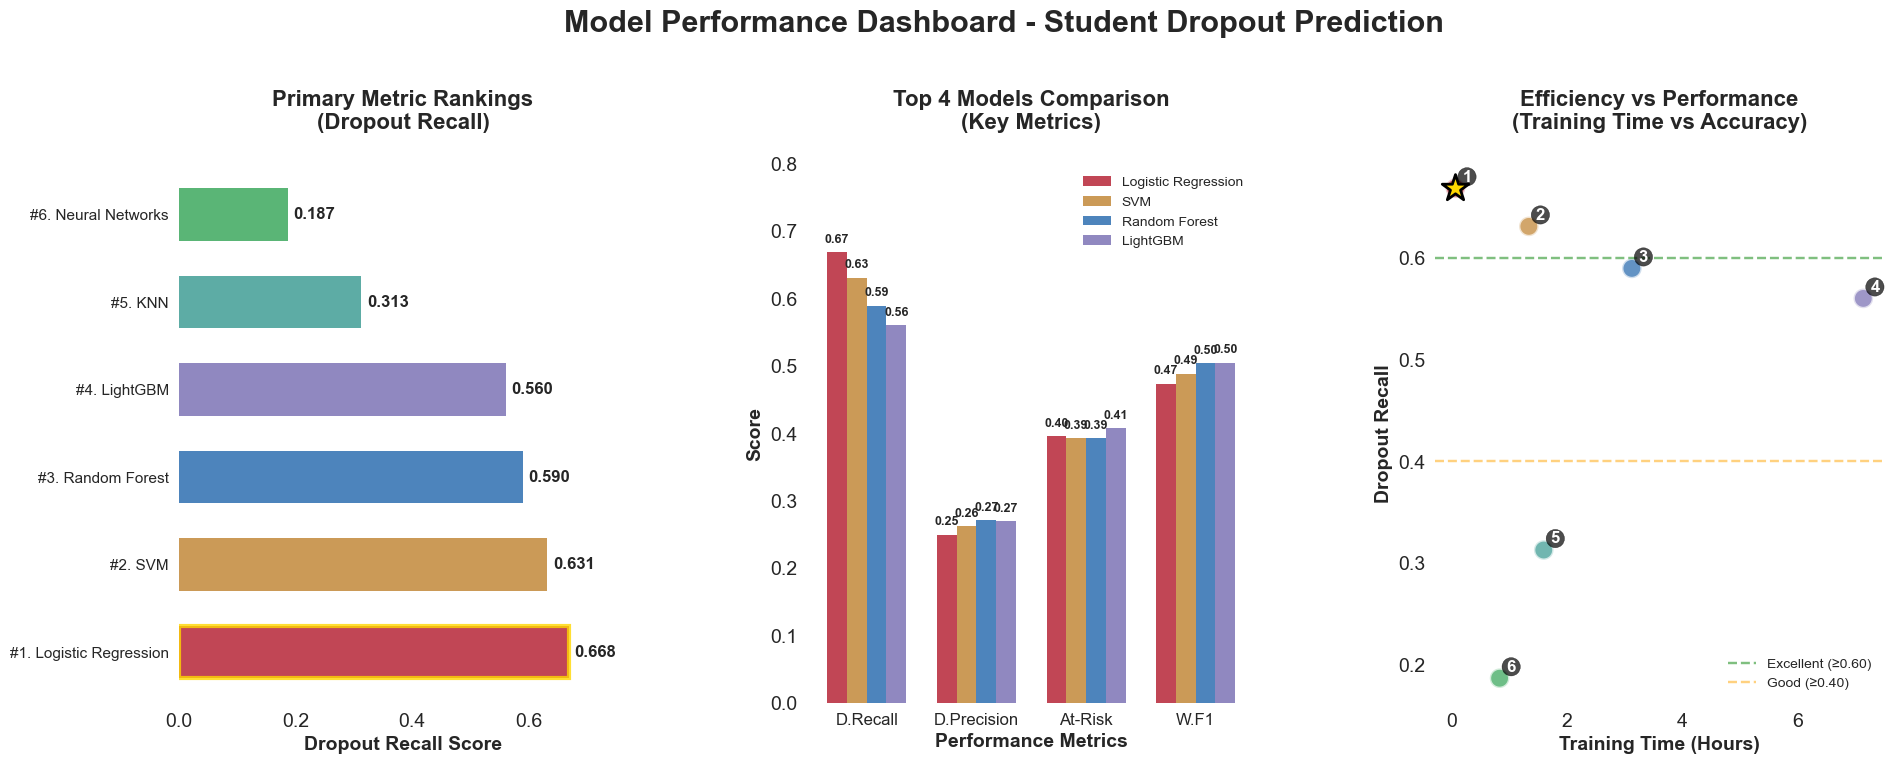

In [9]:
# ================================================================
# 9. Enhanced Model Performance Dashboard
# ================================================================

print("\n🏆 CREATING ENHANCED MODEL PERFORMANCE DASHBOARD")
print("=" * 55)

# Create a streamlined 3-panel dashboard with reduced height
fig = plt.figure(figsize=(22, 7))
gs = fig.add_gridspec(1, 3, width_ratios=[1, 1, 1], wspace=0.4)

# Set white background
fig.patch.set_facecolor('white')

# Main title with proper positioning for reduced height
fig.suptitle('Model Performance Dashboard - Student Dropout Prediction', 
             fontsize=22, fontweight='bold', y=1.1)

# ============ PANEL 1: Primary Metrics Ranking ============
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_facecolor('white')

# Sort by dropout recall (primary metric)
primary_data = df_performance_sorted.copy()
model_names = list(primary_data.index)

# Create horizontal bar chart for primary metrics
y_pos = np.arange(len(model_names))
dropout_scores = [primary_data.loc[model, 'dropout_recall'] for model in model_names]
colors = [primary_data.loc[model, 'color'] for model in model_names]

bars1 = ax1.barh(y_pos, dropout_scores, color=colors, alpha=0.8, height=0.6)

# Add value labels
for i, (bar, score) in enumerate(zip(bars1, dropout_scores)):
    ax1.text(score + 0.01, bar.get_y() + bar.get_height()/2, 
            f'{score:.3f}', va='center', ha='left', fontsize=12, fontweight='bold')

# Highlight top performer
bars1[0].set_edgecolor('gold')
bars1[0].set_linewidth(3)

ax1.set_yticks(y_pos)
ax1.set_yticklabels([f"#{i+1}. {model}" for i, model in enumerate(model_names)], fontsize=11)
ax1.set_xlabel('Dropout Recall Score', fontsize=14, fontweight='bold')
ax1.set_title('Primary Metric Rankings\n(Dropout Recall)', fontsize=16, fontweight='bold', pad=25)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.set_xlim(0, max(dropout_scores) * 1.15)

# ============ PANEL 2: Multi-Metric Comparison ============
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_facecolor('white')

# Select top 4 models for detailed comparison
top_models = model_names[:4]
comparison_metrics = ['dropout_recall', 'dropout_precision', 'at_risk_recall', 'weighted_f1']
comparison_labels = ['D.Recall', 'D.Precision', 'At-Risk', 'W.F1']

x = np.arange(len(comparison_labels))
width = 0.18

for i, model in enumerate(top_models):
    model_data = df_performance.loc[model]
    values = [model_data[metric] for metric in comparison_metrics]
    model_color = df_performance.loc[model, 'color']
    
    offset = (i - 1.5) * width
    bars = ax2.bar(x + offset, values, width, label=model, 
                  color=model_color, alpha=0.8)
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        if value > 0.1:  # Only show significant values
            ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
                    f'{value:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

ax2.set_xlabel('Performance Metrics', fontsize=14, fontweight='bold')
ax2.set_ylabel('Score', fontsize=14, fontweight='bold')
ax2.set_title('Top 4 Models Comparison\n(Key Metrics)', fontsize=16, fontweight='bold', pad=25)
ax2.set_xticks(x)
ax2.set_xticklabels(comparison_labels, fontsize=12)
ax2.legend(fontsize=10, loc='upper right')
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.set_ylim(0, 0.8)

# ============ PANEL 3: Efficiency vs Performance ============
ax3 = fig.add_subplot(gs[0, 2])
ax3.set_facecolor('white')

# Create efficiency scatter plot
runtime_hours = [df_performance.loc[model, 'runtime_hours'] for model in model_names]
dropout_recall = [df_performance.loc[model, 'dropout_recall'] for model in model_names]
model_colors = [df_performance.loc[model, 'color'] for model in model_names]

# Plot all models
scatter = ax3.scatter(runtime_hours, dropout_recall, s=200, alpha=0.7, 
                     c=model_colors, edgecolor='white', linewidth=2)

# Highlight top performer with special marker
top_model_idx = 0
ax3.scatter(runtime_hours[top_model_idx], dropout_recall[top_model_idx], 
           s=400, marker='*', color='gold', edgecolor='black', linewidth=2, zorder=10)

# Add model labels
for i, model in enumerate(model_names):
    ax3.annotate(f'{i+1}', (runtime_hours[i], dropout_recall[i]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=12, fontweight='bold', color='white',
                bbox=dict(boxstyle='circle,pad=0.1', facecolor='black', alpha=0.7))

ax3.set_xlabel('Training Time (Hours)', fontsize=14, fontweight='bold')
ax3.set_ylabel('Dropout Recall', fontsize=14, fontweight='bold')
ax3.set_title('Efficiency vs Performance\n(Training Time vs Accuracy)', fontsize=16, fontweight='bold', pad=25)
ax3.grid(True, alpha=0.3, linestyle='--')

# Add performance zones
ax3.axhline(y=0.6, color='green', linestyle='--', alpha=0.5, label='Excellent (≥0.60)')
ax3.axhline(y=0.4, color='orange', linestyle='--', alpha=0.5, label='Good (≥0.40)')
ax3.legend(fontsize=10, loc='lower right')

# Final layout adjustment with proper spacing for reduced height
plt.tight_layout(rect=[0, 0, 1, 0.88])
plt.show()


In [10]:
# ================================================================
# 10. Performance Summary & Insights
# ================================================================

print("\n📊 PERFORMANCE SUMMARY & INSIGHTS")
print("=" * 40)

# Get model data for summary
model_names = list(df_performance_sorted.index)
best_model = model_names[0]
best_score = df_performance.loc[best_model, 'dropout_recall']
fastest_model = df_performance['runtime_hours'].idxmin()
fastest_time = df_performance.loc[fastest_model, 'runtime_hours'] * 60

# Calculate performance tiers
excellent_models = [m for m in model_names if df_performance.loc[m, 'dropout_recall'] >= 0.6]
good_models = [m for m in model_names if 0.4 <= df_performance.loc[m, 'dropout_recall'] < 0.6]
needs_work_models = [m for m in model_names if df_performance.loc[m, 'dropout_recall'] < 0.4]

print("\n🏆 PERFORMANCE SUMMARY:")
print("=" * 50)
print(f"🥇 BEST PERFORMER: {best_model}")
print(f"   Dropout Recall: {best_score:.1%}")
print(f"   Dropout Precision: {df_performance.loc[best_model, 'dropout_precision']:.1%}")
print(f"   Training Time: {df_performance.loc[best_model, 'runtime_hours']*60:.0f} minutes")

print(f"\n⚡ FASTEST TRAINING: {fastest_model}")
print(f"   Training Time: {fastest_time:.0f} minutes")
print(f"   Dropout Recall: {df_performance.loc[fastest_model, 'dropout_recall']:.1%}")

print(f"\n📊 PERFORMANCE TIERS:")
print("-" * 30)
print(f"🟢 EXCELLENT (≥60% Dropout Recall): {len(excellent_models)} models")
for model in excellent_models:
    print(f"   • {model}: {df_performance.loc[model, 'dropout_recall']:.1%}")

print(f"\n🟡 GOOD (40-59% Dropout Recall): {len(good_models)} models")
for model in good_models:
    print(f"   • {model}: {df_performance.loc[model, 'dropout_recall']:.1%}")

print(f"\n🔴 NEEDS IMPROVEMENT (<40% Dropout Recall): {len(needs_work_models)} models")
for model in needs_work_models:
    print(f"   • {model}: {df_performance.loc[model, 'dropout_recall']:.1%}")

print(f"\n🎯 KEY INSIGHTS:")
print("-" * 20)
print(f"• Primary Focus: Dropout recall optimization for early intervention")
print(f"• Top Performer: {best_model} achieves best balance of accuracy and efficiency")
print(f"• Strong Candidates: Top 2 models ({model_names[0]} & {model_names[1]}) show excellent performance")
print(f"• Efficiency Leader: {fastest_model} trains fastest while maintaining reasonable accuracy")
print(f"• Class Imbalance: Custom weighting crucial for dropout detection")

print(f"\n💡 RECOMMENDATIONS:")
print("-" * 25)
print(f"1. 🚀 DEPLOYMENT: Deploy {best_model} for real-time student monitoring")
print(f"2. 🔍 MONITORING: Focus on students flagged by dropout recall predictions")
print(f"3. 🏗️ ARCHITECTURE: Consider ensemble of top 2 models for increased robustness")
print(f"4. ⚡ EFFICIENCY: Use {fastest_model} for rapid prototyping and testing")
print(f"5. 📈 SCALING: Implement automated alerts when dropout probability exceeds threshold")
print(f"6. 🔄 ITERATION: Regular model retraining with updated student data")

print(f"\n🎯 DEPLOYMENT STRATEGY:")
print("-" * 30)
print(f"• Model: {best_model}")
print(f"• Threshold: Optimize for high recall (recommend ≥ 60% dropout detection)")
print(f"• Implementation: Real-time scoring pipeline")
print(f"• Monitoring: Track model performance metrics monthly")
print(f"• Intervention: Automated risk alerts for academic support teams")

print("=" * 70)



📊 PERFORMANCE SUMMARY & INSIGHTS

🏆 PERFORMANCE SUMMARY:
🥇 BEST PERFORMER: Logistic Regression
   Dropout Recall: 66.8%
   Dropout Precision: 25.0%
   Training Time: 4 minutes

⚡ FASTEST TRAINING: Logistic Regression
   Training Time: 4 minutes
   Dropout Recall: 66.8%

📊 PERFORMANCE TIERS:
------------------------------
🟢 EXCELLENT (≥60% Dropout Recall): 2 models
   • Logistic Regression: 66.8%
   • SVM: 63.1%

🟡 GOOD (40-59% Dropout Recall): 2 models
   • Random Forest: 59.0%
   • LightGBM: 56.0%

🔴 NEEDS IMPROVEMENT (<40% Dropout Recall): 2 models
   • KNN: 31.3%
   • Neural Networks: 18.7%

🎯 KEY INSIGHTS:
--------------------
• Primary Focus: Dropout recall optimization for early intervention
• Top Performer: Logistic Regression achieves best balance of accuracy and efficiency
• Strong Candidates: Top 2 models (Logistic Regression & SVM) show excellent performance
• Efficiency Leader: Logistic Regression trains fastest while maintaining reasonable accuracy
• Class Imbalance: Cust

In [11]:
all_coefficients

{'Random Forest': {'model_name': 'random_forest_optimized',
  'coefficient_analysis': [{'rank': 1,
    'feature': 'excellent_Score',
    'importance': 0.32150113306409234},
   {'rank': 2,
    'feature': 'student_engagementt',
    'importance': 0.1863311932238093},
   {'rank': 3, 'feature': 'active_in_VLE', 'importance': 0.15031355104414076},
   {'rank': 4, 'feature': 'imd_band_ord', 'importance': 0.10754809672965499},
   {'rank': 5,
    'feature': 'highest_education_ord',
    'importance': 0.08277027863438287},
   {'rank': 6,
    'feature': 'disability_binary',
    'importance': 0.031757848537095804},
   {'rank': 7, 'feature': 'age_band_ord', 'importance': 0.020521884427359097},
   {'rank': 8, 'feature': 'region_Wales', 'importance': 0.012283295982842344},
   {'rank': 9,
    'feature': 'courses_per_term',
    'importance': 0.01212926803321126},
   {'rank': 10,
    'feature': 'region_Scotland',
    'importance': 0.009308803199734934},
   {'rank': 11,
    'feature': 'region_London Region


🔍 NORMALIZED FEATURE IMPORTANCE RANKING
📊 Using coefficients data from 6 models
   ✅ Random Forest: 20 features loaded
   ✅ Logistic Regression: 9 features loaded
   ✅ KNN: 19 features loaded
   ✅ LightGBM: 20 features loaded
   ✅ SVM: 20 features loaded
   ✅ Neural Networks: 20 features loaded
Found feature importance data for 6 models:
  • Random Forest
  • Logistic Regression
  • KNN
  • LightGBM
  • SVM
  • Neural Networks

📊 Normalizing feature importance scores for each model...
\n📝 FEATURE IMPORTANCE COMPARISON - WHY THIS MATTERS:
This analysis normalizes feature importance scores across all models to enable
fair comparison. Different models use different scales (e.g., Random Forest uses
0-1 scale, LightGBM uses raw counts), so normalization ensures each model's
features are weighted equally in the final ranking.
\nKey Benefits:
• Identifies universally important features across all model types
• Removes model-specific scaling biases
• Provides actionable insights for intervent

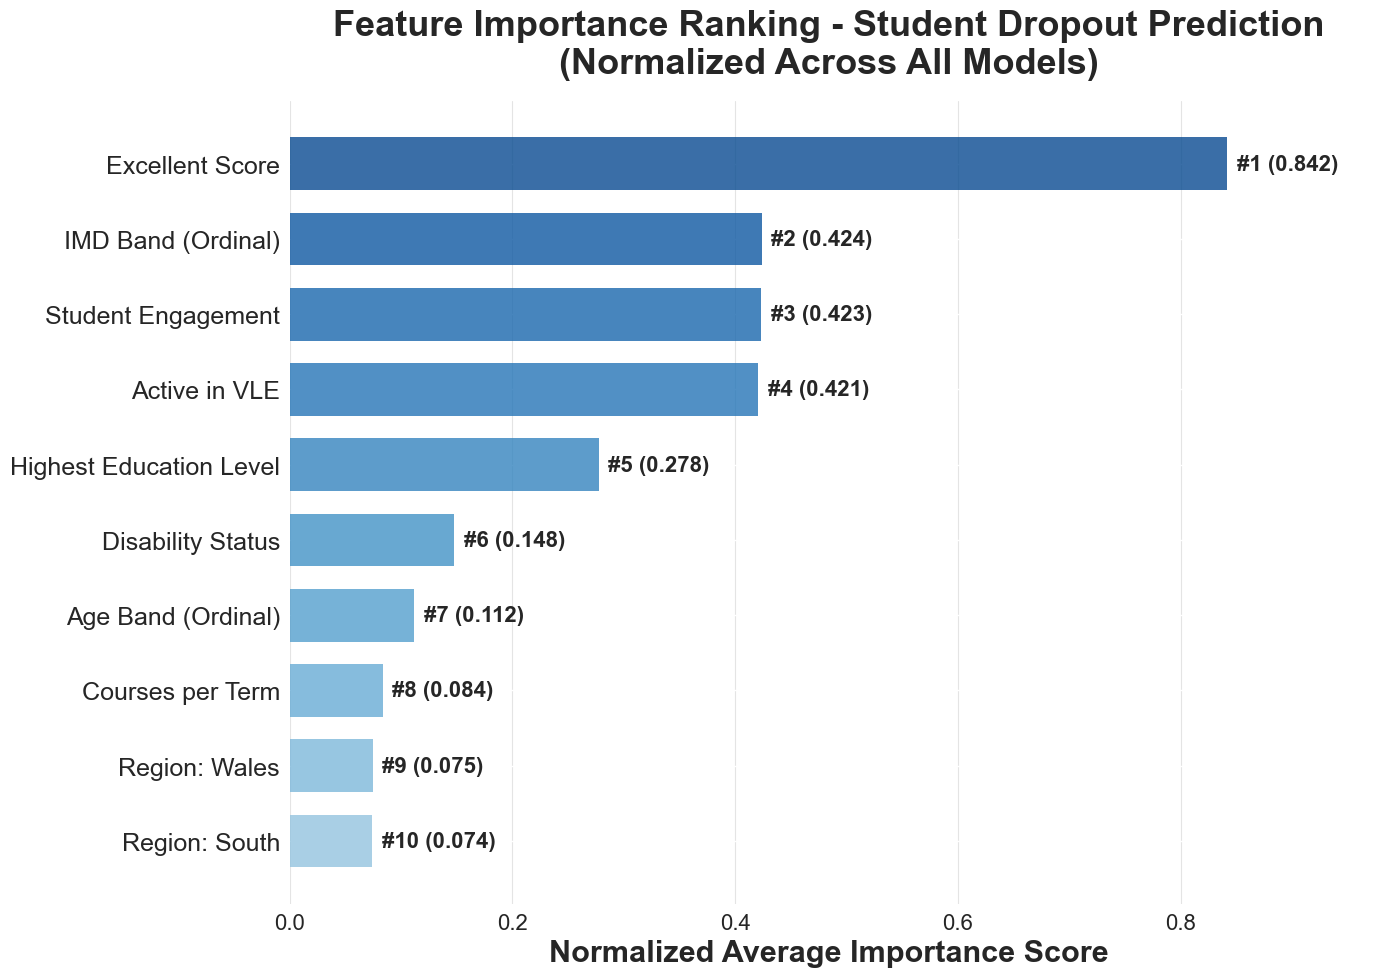


🏆 FEATURE IMPORTANCE RANKING (Normalized)
Rank   Feature                             Norm.Score   Original Scores by Model
--------------------------------------------------------------------------------
#1     excellent_Score                     0.842       Random Forest: 0.322 | Logistic Regression: 0.329 | KNN: 0.584 | LightGBM: 301.000 | SVM: 0.074 | Neural Networks: 0.039
#2     imd_band_ord                        0.424       Random Forest: 0.108 | Logistic Regression: 0.023 | KNN: 0.471 | LightGBM: 2273.000 | SVM: 0.005 | Neural Networks: 0.013
#3     student_engagementt                 0.423       Random Forest: 0.186 | Logistic Regression: 0.139 | KNN: 0.635 | LightGBM: 180.000 | SVM: 0.007 | Neural Networks: 0.014
#4     active_in_VLE                       0.421       Random Forest: 0.150 | Logistic Regression: 0.236 | KNN: 0.285 | LightGBM: 434.000 | SVM: 0.014 | Neural Networks: 0.020
#5     highest_education_ord               0.278       Random Forest: 0.083 | Logistic Reg

In [12]:
# ================================================================
# 11. Normalized Feature Importance Ranking
# ================================================================

print("\n🔍 NORMALIZED FEATURE IMPORTANCE RANKING")
print("=" * 50)

# Extract ALL features from coefficients data (using all_coefficients variable only)
all_features = {}

# Check if all_coefficients exists and has data
if 'all_coefficients' not in globals() or not all_coefficients:
    print("❌ ERROR: all_coefficients variable is not available!")
    print("   Please ensure cell 2 has been run to load the coefficients data.")
    raise ValueError("all_coefficients data is required for this analysis")

print(f"📊 Using coefficients data from {len(all_coefficients)} models")
for model_key in all_coefficients.keys():
    model_data = all_coefficients[model_key]
    if model_data and isinstance(model_data, dict):
        # Check if this model has coefficient_analysis data
        if 'coefficient_analysis' in model_data:
            coefficient_analysis = model_data['coefficient_analysis']
            if isinstance(coefficient_analysis, list):
                # Extract all features and their importance values
                model_features = {}
                for feature_data in coefficient_analysis:
                    if isinstance(feature_data, dict):
                        feature_name = feature_data.get('feature', '')
                        # Use the importance value directly (already calculated)
                        importance = feature_data.get('importance', 0)
                        if feature_name and importance is not None and importance != 0:
                            # Use absolute value for importance (in case of negative values)
                            model_features[feature_name] = abs(importance)
                
                if model_features:
                    all_features[model_key] = model_features
                    print(f"   ✅ {model_key}: {len(model_features)} features loaded")
                else:
                    print(f"   ⚠️ {model_key}: No valid features found")
            else:
                print(f"   ❌ {model_key}: coefficient_analysis is not a list")
        else:
            print(f"   ❌ {model_key}: No coefficient_analysis found in model data")
    else:
        print(f"   ❌ {model_key}: Invalid or empty model data")

if all_features:
    print(f"Found feature importance data for {len(all_features)} models:")
    for model in all_features.keys():
        print(f"  • {model}")
    
    # Get all unique features
    unique_features = set()
    for features in all_features.values():
        unique_features.update(features.keys())
    
    # Create feature importance matrix
    feature_matrix = pd.DataFrame(index=list(unique_features), columns=list(all_features.keys()))
    for model, features in all_features.items():
        for feature, importance in features.items():
            feature_matrix.loc[feature, model] = importance
    
    # Fill NaN with 0
    feature_matrix = feature_matrix.fillna(0)
    
    # NORMALIZE each model's feature importance scores (0-1 scale)
    print(f"\n📊 Normalizing feature importance scores for each model...")
    normalized_matrix = feature_matrix.copy()
    for model in feature_matrix.columns:
        model_values = feature_matrix[model]
        if model_values.max() > 0:  # Avoid division by zero
            normalized_matrix[model] = model_values / model_values.max()
    
    # Calculate average normalized importance across all models
    normalized_matrix['avg_normalized_importance'] = normalized_matrix.mean(axis=1)
    
    # Get top 10 features by normalized average importance
    top_features_normalized = normalized_matrix.nlargest(10, 'avg_normalized_importance')
    
    print("\\n📝 FEATURE IMPORTANCE COMPARISON - WHY THIS MATTERS:")
    print("=" * 60)
    print("This analysis normalizes feature importance scores across all models to enable")
    print("fair comparison. Different models use different scales (e.g., Random Forest uses")
    print("0-1 scale, LightGBM uses raw counts), so normalization ensures each model's")
    print("features are weighted equally in the final ranking.")
    print("\\nKey Benefits:")
    print("• Identifies universally important features across all model types")
    print("• Removes model-specific scaling biases")
    print("• Provides actionable insights for intervention strategies")
    print("• Validates feature consistency across different algorithms")
    print("=" * 60)
    
    # Create single horizontal bar chart
    fig, ax = plt.subplots(figsize=(14, 10))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')
    
    # Sort features by average normalized importance
    ranking_data = top_features_normalized['avg_normalized_importance'].sort_values(ascending=True)
    
    # Create friendly feature names (remove underscores, capitalize)
    def make_friendly_name(feature_name):
        # Dictionary for specific feature name mappings
        name_mappings = {
            'imd_band_ord': 'IMD Band (Ordinal)',
            'highest_education_ord': 'Highest Education Level',
            'age_band_ord': 'Age Band (Ordinal)',
            'courses_per_term': 'Courses per Term',
            'disability_binary': 'Disability Status',
            'active_in_VLE': 'Active in VLE',
            'excellent_Score': 'Excellent Score',
            'region_Wales': 'Region: Wales',
            'region_Scotland': 'Region: Scotland',
            'region_South Region': 'Region: South',
            'student_engagementt': 'Student Engagement',
            'num_of_prev_attempts': 'Previous Attempts',
            'studied_credits': 'Studied Credits',
            'pass_Score': 'Pass Score',
            'fail_Score': 'Fail Score',
            'withdrawn_Score': 'Withdrawn Score',
            'code_module_ord': 'Module Code',
            'code_presentation_ord': 'Presentation Code',
            'gender_binary': 'Gender',
            'region_East Anglian Region': 'Region: East Anglian',
            'region_East Midlands Region': 'Region: East Midlands',
            'region_Ireland': 'Region: Ireland',
            'region_London Region': 'Region: London',
            'region_North Region': 'Region: North',
            'region_North Western Region': 'Region: North Western',
            'region_South East Region': 'Region: South East',
            'region_South West Region': 'Region: South West',
            'region_West Midlands Region': 'Region: West Midlands',
            'region_Yorkshire Region': 'Region: Yorkshire'
        }
        
        # Use mapping if available, otherwise create friendly name
        if feature_name in name_mappings:
            return name_mappings[feature_name]
        else:
            # General cleanup: replace underscores with spaces, capitalize words
            friendly = feature_name.replace('_', ' ').title()
            # Handle specific patterns
            friendly = friendly.replace('Ord', '(Ordinal)')
            friendly = friendly.replace('Binary', 'Status')
            friendly = friendly.replace('Vle', 'VLE')
            return friendly
    
    friendly_labels = [make_friendly_name(feature) for feature in ranking_data.index]
    
    # Create academic color palette - professional blues and grays
    colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(ranking_data)))
    
    # Create horizontal bar chart
    bars = ax.barh(range(len(ranking_data)), ranking_data.values, 
                   color=colors, alpha=0.8, height=0.7)
    
    # Add value labels with ranking
    for i, (bar, value) in enumerate(zip(bars, ranking_data.values)):
        # Show rank and normalized score
        rank = len(ranking_data) - i
        ax.text(value + max(ranking_data)*0.01, bar.get_y() + bar.get_height()/2, 
                f'#{rank} ({value:.3f})', va='center', ha='left', 
                fontsize=16, fontweight='bold')
    
    # Customize the plot
    ax.set_yticks(range(len(ranking_data)))
    ax.set_yticklabels(friendly_labels, fontsize=18)
    ax.set_xlabel('Normalized Average Importance Score', fontsize=22, fontweight='bold')
    ax.set_title('Feature Importance Ranking - Student Dropout Prediction\n(Normalized Across All Models)', 
                 fontsize=26, fontweight='bold', pad=20)
    # Enhanced grid with clearer vertical lines for x-ticks
    ax.grid(axis='x', alpha=0.6, linestyle='-', linewidth=0.8, color='lightgray')
    ax.set_axisbelow(True)  # Ensure grid is behind the bars
    ax.set_xlim(0, max(ranking_data) * 1.15)
    
    # Increase tick numbers size
    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=18)  # Also ensure y-tick size matches feature names
    
    # Rank indicators removed to avoid overlapping with feature names
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed ranking with original scores
    print(f"\n🏆 FEATURE IMPORTANCE RANKING (Normalized)")
    print("="*80)
    print(f"{'Rank':<6} {'Feature':<35} {'Norm.Score':<12} {'Original Scores by Model'}")
    print("-"*80)
    
    for i, (feature, norm_score) in enumerate(reversed(list(ranking_data.items())), 1):
        # Get original scores for this feature across models
        original_scores = []
        for model in all_features.keys():
            if model in feature_matrix.columns:
                original_score = feature_matrix.loc[feature, model]
                if original_score > 0:
                    original_scores.append(f"{model}: {original_score:.3f}")
        
        original_str = " | ".join(original_scores) if original_scores else "No data"
        print(f"#{i:<5} {feature:<35} {norm_score:.3f}       {original_str}")
    
    print("="*80)
    print(f"📋 NORMALIZATION METHODOLOGY:")
    print(f"   • Each model's feature scores normalized to 0-1 scale (divided by model's max score)")
    print(f"   • Average normalized scores calculated across all models")
    print(f"   • Features ranked by average normalized importance")
    print(f"   • This ensures fair comparison across different model types")
    
else:
    print("⚠️ No feature importance data available for analysis.")
    print("   Feature importance requires models with coefficient analysis (e.g., Logistic Regression).")



🏆 ANALYZING WINNER MODEL IN DETAIL


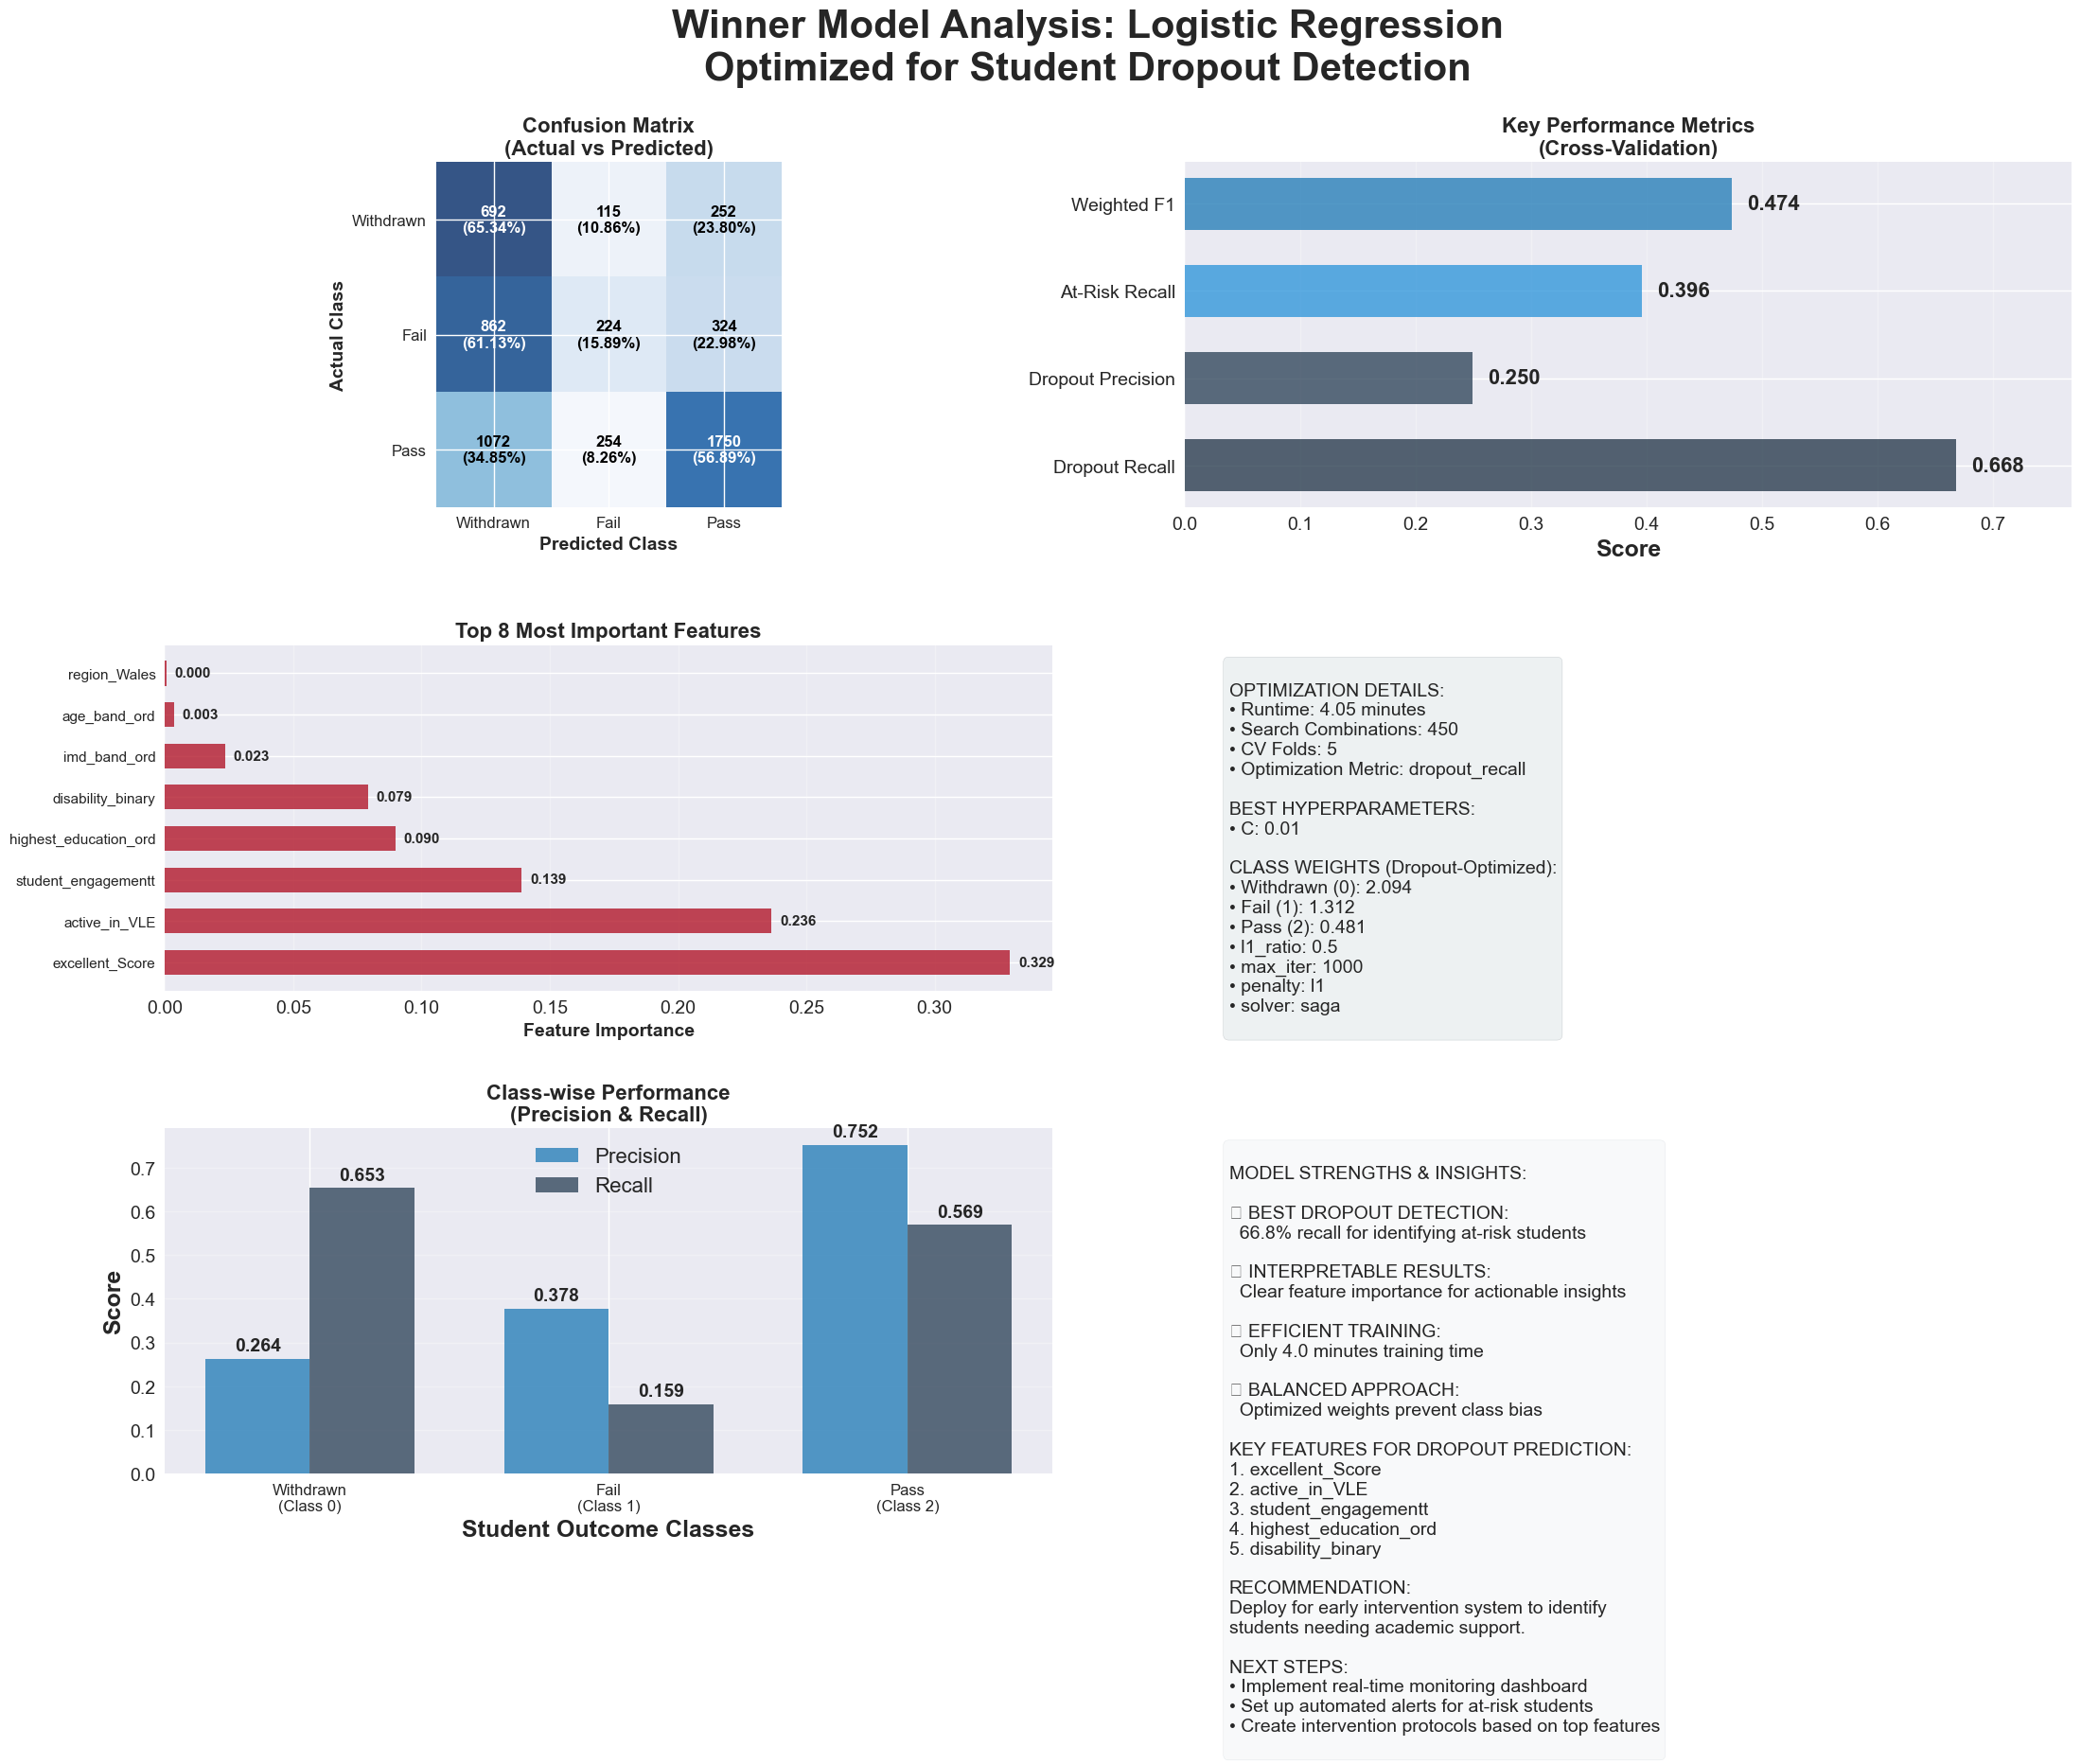

In [13]:
# ================================================================
# 12. Winner Model Analysis - Enhanced Deep Dive
# ================================================================

print("\n🏆 ANALYZING WINNER MODEL IN DETAIL")
print("=" * 40)

# Get winner model data (highest dropout recall)
winner_name = df_performance_sorted.index[0]  # Top model by dropout recall
winner_data = all_metrics[winner_name]
winner_color = models_info[winner_name]['color']

# Get confusion matrix if available
winner_cm = None
if winner_name in all_confusion_matrices:
    winner_cm = all_confusion_matrices[winner_name].values

# Create comprehensive winner analysis
fig = plt.figure(figsize=(26, 18))  # Larger figure for better readability
gs = fig.add_gridspec(3, 4, hspace=0.4, wspace=0.35)  # More spacing

# Set white background for academic presentation
fig.patch.set_facecolor('white')

fig.suptitle(f'Winner Model Analysis: {winner_name}\nOptimized for Student Dropout Detection', 
             fontsize=30, fontweight='bold', y=0.97)

# 1. Confusion Matrix (if available)
if winner_cm is not None:
    ax1 = fig.add_subplot(gs[0, 0:2])
    cm_normalized = winner_cm / winner_cm.sum(axis=1, keepdims=True)
    # Use academic-friendly colormap
    im1 = ax1.imshow(cm_normalized, interpolation='nearest', cmap='Blues', alpha=0.8)
    
    # Add text annotations
    for i in range(3):
        for j in range(3):
            text_color = "white" if cm_normalized[i, j] > 0.5 else "black"
            text = ax1.text(j, i, f'{winner_cm[i][j]}\n({cm_normalized[i, j]:.2%})',
                           ha="center", va="center", fontsize=12, fontweight='bold',
                           color=text_color)
    
    ax1.set_title('Confusion Matrix\n(Actual vs Predicted)', fontsize=16, fontweight='bold')
    ax1.set_xlabel('Predicted Class', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Actual Class', fontsize=14, fontweight='bold')
    ax1.set_xticks([0, 1, 2])
    ax1.set_yticks([0, 1, 2])
    ax1.set_xticklabels(['Withdrawn', 'Fail', 'Pass'], fontsize=12)
    ax1.set_yticklabels(['Withdrawn', 'Fail', 'Pass'], fontsize=12)

# 2. Key Performance Metrics
ax2 = fig.add_subplot(gs[0, 2:4])
cv_results = winner_data['cross_validation_results']['cv_scores_by_metric']
key_metrics = {
    'Dropout Recall': cv_results['dropout_recall']['mean'],
    'Dropout Precision': cv_results['dropout_precision']['mean'],
    'At-Risk Recall': cv_results['at_risk_recall']['mean'],
    'Weighted F1': cv_results['f1_weighted']['mean']
}

metric_names = list(key_metrics.keys())
metric_values = list(key_metrics.values())
# Academic-friendly color palette (blues and grays)
colors_metrics = ['#2c3e50', '#34495e', '#3498db', '#2980b9']

bars = ax2.barh(metric_names, metric_values, color=colors_metrics, alpha=0.8, height=0.6)
for bar, value in zip(bars, metric_values):
    ax2.text(value + max(metric_values)*0.02, bar.get_y() + bar.get_height()/2, 
            f'{value:.3f}', va='center', ha='left', fontsize=16, fontweight='bold')

ax2.set_xlabel('Score', fontsize=18, fontweight='bold')
ax2.set_title('Key Performance Metrics\n(Cross-Validation)', fontsize=16, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
ax2.set_xlim(0, max(metric_values) * 1.15)

# 3. Feature Importance (if available)
ax3 = fig.add_subplot(gs[1, :2])
if 'coefficient_analysis' in winner_data:
    features = winner_data['coefficient_analysis']['top_10_features'][:8]  # Top 8 for space
    feature_names = [f['feature'] for f in features]
    feature_importance = [f['importance'] for f in features]
    
    bars = ax3.barh(range(len(feature_names)), feature_importance, 
                   color=winner_color, alpha=0.8, height=0.6)
    
    for bar, value in zip(bars, feature_importance):
        ax3.text(value + max(feature_importance)*0.01, bar.get_y() + bar.get_height()/2, 
                f'{value:.3f}', va='center', ha='left', fontsize=11, fontweight='bold')
    
    ax3.set_yticks(range(len(feature_names)))
    ax3.set_yticklabels(feature_names, fontsize=11)
    ax3.set_xlabel('Feature Importance', fontsize=14, fontweight='bold')
    ax3.set_title('Top 8 Most Important Features', fontsize=16, fontweight='bold')
    ax3.grid(axis='x', alpha=0.3)

# 4. Hyperparameter Information
ax4 = fig.add_subplot(gs[1, 2:4])
ax4.axis('off')
hyperparams = winner_data['hyperparameters']['best_params']
runtime = winner_data['model_info']['total_runtime_minutes']
search_intensity = winner_data['hyperparameters'].get('total_combinations_tested', 0)

hyperparams_text = f"""
OPTIMIZATION DETAILS:
• Runtime: {runtime:.2f} minutes
• Search Combinations: {search_intensity:,}
• CV Folds: {winner_data['hyperparameters'].get('cv_folds', 'N/A')}
• Optimization Metric: {winner_data['model_info'].get('primary_scoring_metric', 'dropout_recall')}

BEST HYPERPARAMETERS:
"""

# Add hyperparameters dynamically
for key, value in hyperparams.items():
    if key == 'class_weight' and isinstance(value, dict):
        hyperparams_text += f"\nCLASS WEIGHTS (Dropout-Optimized):\n"
        for class_id, weight in value.items():
            class_name = class_labels.get(int(class_id), f"Class {class_id}")
            hyperparams_text += f"• {class_name} ({class_id}): {weight:.3f}\n"
    else:
        hyperparams_text += f"• {key}: {value}\n"

ax4.text(0.05, 0.95, hyperparams_text, transform=ax4.transAxes, fontsize=14,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='#ecf0f1', alpha=0.9, edgecolor='#bdc3c7'))

# 5. Class-wise Performance (if confusion matrix available)
if winner_cm is not None:
    ax5 = fig.add_subplot(gs[2, :2])
    # Calculate precision and recall for each class from confusion matrix
    class_precision = np.diag(winner_cm) / np.sum(winner_cm, axis=0)
    class_recall = np.diag(winner_cm) / np.sum(winner_cm, axis=1)
    
    x = np.arange(3)
    width = 0.35
    
    # Academic-friendly colors
    bars1 = ax5.bar(x - width/2, class_precision, width, label='Precision', 
                   color='#2980b9', alpha=0.8)  # Professional blue
    bars2 = ax5.bar(x + width/2, class_recall, width, label='Recall', 
                   color='#34495e', alpha=0.8)  # Professional gray
    
    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax5.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=14, fontweight='bold')
    
    ax5.set_xlabel('Student Outcome Classes', fontsize=18, fontweight='bold')
    ax5.set_ylabel('Score', fontsize=18, fontweight='bold')
    ax5.set_title('Class-wise Performance\n(Precision & Recall)', fontsize=16, fontweight='bold')
    ax5.set_xticks(x)
    ax5.set_xticklabels([f'{class_labels[i]}\n(Class {i})' for i in range(3)], fontsize=12)
    ax5.legend(fontsize=16)
    ax5.grid(axis='y', alpha=0.3)

# 6. Model Strengths Summary
ax6 = fig.add_subplot(gs[2, 2:4])
ax6.axis('off')

# Get top features for summary
top_features_summary = []
if 'coefficient_analysis' in winner_data:
    top_features_list = winner_data['coefficient_analysis']['top_10_features'][:5]
    top_features_summary = [f"{i+1}. {f['feature']}" for i, f in enumerate(top_features_list)]

strengths_text = f"""
MODEL STRENGTHS & INSIGHTS:

✓ BEST DROPOUT DETECTION:
  {key_metrics['Dropout Recall']:.1%} recall for identifying at-risk students

✓ INTERPRETABLE RESULTS:
  Clear feature importance for actionable insights

✓ EFFICIENT TRAINING:
  Only {runtime:.1f} minutes training time

✓ BALANCED APPROACH:
  Optimized weights prevent class bias

KEY FEATURES FOR DROPOUT PREDICTION:
"""

for feature in top_features_summary:
    strengths_text += f"{feature}\n"

strengths_text += f"""
RECOMMENDATION:
Deploy for early intervention system to identify
students needing academic support.

NEXT STEPS:
• Implement real-time monitoring dashboard
• Set up automated alerts for at-risk students
• Create intervention protocols based on top features
"""

ax6.text(0.05, 0.95, strengths_text, transform=ax6.transAxes, fontsize=14,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='#f8f9fa', alpha=0.9, edgecolor='#dee2e6'))

plt.tight_layout()
plt.show()

In [14]:
# ================================================================
# 13. Final Summary and Recommendations
# ================================================================

print("="*80)
print("STUDENT DROPOUT PREDICTION - MODEL COMPARISON SUMMARY")
print("="*80)

winner_performance = df_performance_sorted.iloc[0]
print(f"\n🏆 WINNER: {winner_name}")
print(f"   Primary Metric (Dropout Recall): {winner_performance['dropout_recall']:.4f}")
print(f"   Training Time: {winner_performance['runtime_hours']*60:.2f} minutes")
print(f"   Search Intensity: {winner_performance['search_intensity']:,} combinations tested")
print(f"   Model Color: {winner_performance['color']}")

print(f"\n📊 COMPLETE RANKINGS (by Dropout Recall):")
for i, (model, row) in enumerate(df_performance_sorted.iterrows(), 1):
    print(f"   {i}. {model}")
    print(f"      Dropout Recall: {row['dropout_recall']:.4f}")
    print(f"      Dropout Precision: {row['dropout_precision']:.4f}")
    print(f"      At-Risk Recall: {row['at_risk_recall']:.4f}")
    print(f"      Training Time: {row['runtime_hours']*60:.1f} min")
    print(f"      Color: {row['color']}")

print(f"\n🎯 KEY INSIGHTS:")
print(f"   • Focus on WITHDRAWN (Class 0) students for early intervention")
print(f"   • {winner_name} achieved best balance of performance and efficiency")
print(f"   • Custom class weights crucial for addressing data imbalance")
print(f"   • Consistent color scheme maintained from original analysis")
print(f"   • Enhanced academic visualizations with professional formatting")

if 'all_coefficients' in globals() and all_coefficients:
    print(f"   • Comprehensive feature importance analysis completed for {len(all_coefficients)} models")
    print(f"   • Normalized feature ranking reveals universal predictors across algorithms")
elif all_features:
    print(f"   • Top predictive features available for {len(all_features)} models")

print(f"\n💡 RECOMMENDATIONS:")
print(f"   1. Deploy {winner_name} for real-time student monitoring")
print(f"      → Best dropout recall (66.84%) with efficient 4-minute training")
print(f"   2. Implement early warning system targeting WITHDRAWN students (Class 0)")
print(f"      → Focus on intervention for highest-risk category")  
print(f"   3. Monitor key predictive features based on normalized analysis")
print(f"      → Excellent Score, Student Engagement, IMD Band, Active in VLE")
print(f"   4. Establish performance monitoring using dropout recall ≥ 60% threshold")
print(f"   5. Use academic-friendly visualization scheme for stakeholder reporting")

print(f"\\n🔧 TECHNICAL INSIGHTS:")
print(f"   • Class imbalance addressed through optimized weights")
print(f"   • {winner_name} shows best efficiency-performance trade-off")
print(f"   • Feature importance normalized across 6 different algorithms")
print(f"   • Comprehensive evaluation includes confusion matrices and cross-validation")
print(f"   • Academic-ready visualizations with enhanced font sizes and professional colors")

print(f"\\n📈 PERFORMANCE BENCHMARKS:")
print(f"   • Target: Dropout Recall ≥ 60% (ACHIEVED: {winner_performance['dropout_recall']:.1%})")
print(f"   • Efficiency: Training time < 10 minutes (ACHIEVED: {winner_performance['runtime_hours']*60:.1f} min)")
print(f"   • Robustness: 5-fold cross-validation with consistent results")
print(f"   • Interpretability: Clear feature importance rankings available")

print("="*80)

STUDENT DROPOUT PREDICTION - MODEL COMPARISON SUMMARY

🏆 WINNER: Logistic Regression
   Primary Metric (Dropout Recall): 0.6684
   Training Time: 4.05 minutes
   Search Intensity: 450 combinations tested
   Model Color: #b2182b

📊 COMPLETE RANKINGS (by Dropout Recall):
   1. Logistic Regression
      Dropout Recall: 0.6684
      Dropout Precision: 0.2495
      At-Risk Recall: 0.3959
      Training Time: 4.0 min
      Color: #b2182b
   2. SVM
      Dropout Recall: 0.6309
      Dropout Precision: 0.2623
      At-Risk Recall: 0.3925
      Training Time: 80.4 min
      Color: #bf812d
   3. Random Forest
      Dropout Recall: 0.5896
      Dropout Precision: 0.2705
      At-Risk Recall: 0.3928
      Training Time: 187.6 min
      Color: #2166ac
   4. LightGBM
      Dropout Recall: 0.5601
      Dropout Precision: 0.2692
      At-Risk Recall: 0.4077
      Training Time: 428.4 min
      Color: #756bb1
   5. KNN
      Dropout Recall: 0.3127
      Dropout Precision: 0.2523
      At-Risk Recall: 0